In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cluster Analysis of Bank Customer for Defining Marketing Strategy

The dataset used in this project comes from [here](https://www.kaggle.com/arjunbhasin2013/ccdata) and will be used to build a clustering model that will divide the customer base into a specific number of clusters (to be defined). The segments of the customer base can then be used by the bank to better target their products to them. The project will be split into several parts:
- exploratory data analysis (loading and understanding the dataset, exploring numerical/categorical variables, finding outliers, checking correlations among various numerical attributes, )  
- data preprocessing (preparing the data for the ML algorithms including checking and dealing with missing values (imputing), dealing with outliers, dealing with attributes that may be correlated with each other and also handling and text or categorical attributes)
- feature scaling 
- creating transformation pipeline (for the sake of it) - in case more data arises  
- choosing the right ML algorithms and creating and assessing the ML models  
- fine tuning the models  

**Dataset description:**
```
This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases
-  BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advance"
- PURCHASES_TRX : Number of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user
```

First I will create a dictionary with the information above that I can call throughout the notebook so that I don't have to scroll back up to find the information I need.

In [1]:
information = {'BALANCE':"Available balance left on the card to make purchases (continuous)",
               'BALANCE_FREQUENCY': "The frequency of updating the balance: 0 to 1 where \
                                     1 indicates frequent and 0 indicates not frequent (continuous)",
               'PURCHASES': "Amount of purchases made by that credit card (continuous)",
               'ONEOFF_PURCHASES': "Highest one-time purchase value (continuous)",
               'INSTALLMENTS_PURCHASES': "Value of purchases paid for in installments (continuous)",
               'CASH_ADVANCE': "Advance cash given by the customer",
               'PURCHASES_FREQUENCY': "Frequency of purchases: 0 to 1 where 1 indicates frequent \
                                       and 0 indicates not frequent (continuous)",
               'ONEOFF_PURCHASES_FREQUENCY': "Frequency of one-time purchases (not installments): 0 to 1 \
                                               where 1 indicates frequent and 0 indicates not frequent (continuous)",
               'PURCHASES_INSTALLMENTS_FREQUENCY': "Frequency of purchases made in installments: 0 to 1 \
                                               where 1 indicates frequent and 0 indicates not frequent (continuous)",
               'CASH_ADVANCE_FREQUENCY': "Frequency of cash advances: 0 to 1 where 1 indicates frequent \
                                       and 0 indicates not frequent (continuous)",
               'CASH_ADVANCE_TRX': "Number of transactions made with 'cash in advance'",
               'PURCHASES_TRX': "Number of purchases transactions made",
               'CREDIT_LIMIT': "The credit limit of the customer",
               'PAYMENTS': "Total amount of payments done by a customer",
               'MINIMUM_PAYMENTS': "The amount of minimum payments made by a customer",
               'PRC_FULL_PAYMENT': "Percentage of the full credit card payment made by a customer",
               'TENURE': "Tenure of the credit card service of a customer"}

# Exploratory Data Analysis

In [3]:
data = pd.read_csv('Data/cc_usage.csv')

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data['CUST_ID'].describe()

count       8950
unique      8950
top       C10960
freq           1
Name: CUST_ID, dtype: object

The customer ID column is just an identification number (does not repeat) so we can drop it.

In [6]:
data.drop(columns=['CUST_ID'], inplace=True)

Let's verify that the column has been dropped.

In [7]:
data.head().transpose() # transposed so I can see all the categories easier

,0,1,2,3,4
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.000000,0.636364,1.000000
PURCHASES,95.400000,0.000000,773.170000,1499.000000,16.000000
ONEOFF_PURCHASES,0.000000,0.000000,773.170000,1499.000000,16.000000
INSTALLMENTS_PURCHASES,95.400000,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE,0.000000,6442.945483,0.000000,205.788017,0.000000
PURCHASES_FREQUENCY,0.166667,0.000000,1.000000,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.000000,0.000000,1.000000,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.000000,0.000000,0.000000,0.000000
CASH_ADVANCE_FREQUENCY,0.000000,0.250000,0.000000,0.083333,0.000000


Let's look at the column names and the shape of the dataset.

In [8]:
print(data.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


In [9]:
print(data.shape)

(8950, 17)


So there are 8,950 data rows, 17 columns so 17 features we can use in our clustering models.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [11]:
data.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The **CREDIT_LIMIT** and **MINIMUM_PAYMENTS** have some missing values (1 and 313 respectively). They will have to be dealt with accordingly.

The dataset only has **numerical attributes**. Let's look at them using the pandas **describe()** method.

## Exploring numerical attributes

In [12]:
# list of numerical attributes
data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [13]:
# let's summarise the numerical data
# transposing the table so that it's easier to see
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Let's also look at the differences between the means and the medians.

In [14]:
data.describe().transpose()[['50%', 'mean']]

,50%,mean
BALANCE,873.385231,1564.474828
BALANCE_FREQUENCY,1.000000,0.877271
PURCHASES,361.280000,1003.204834
ONEOFF_PURCHASES,38.000000,592.437371
INSTALLMENTS_PURCHASES,89.000000,411.067645
CASH_ADVANCE,0.000000,978.871112
PURCHASES_FREQUENCY,0.500000,0.490351
ONEOFF_PURCHASES_FREQUENCY,0.083333,0.202458
PURCHASES_INSTALLMENTS_FREQUENCY,0.166667,0.364437
CASH_ADVANCE_FREQUENCY,0.000000,0.135144


For quite a few of the features there's a large difference between the two central tendencies explored here (median and mean), indicating the data distribution is quite skewed and/or there are outliers present.

Let's plot the distributions of all of the numerical attributes first.

In [15]:
len(data.columns)

17

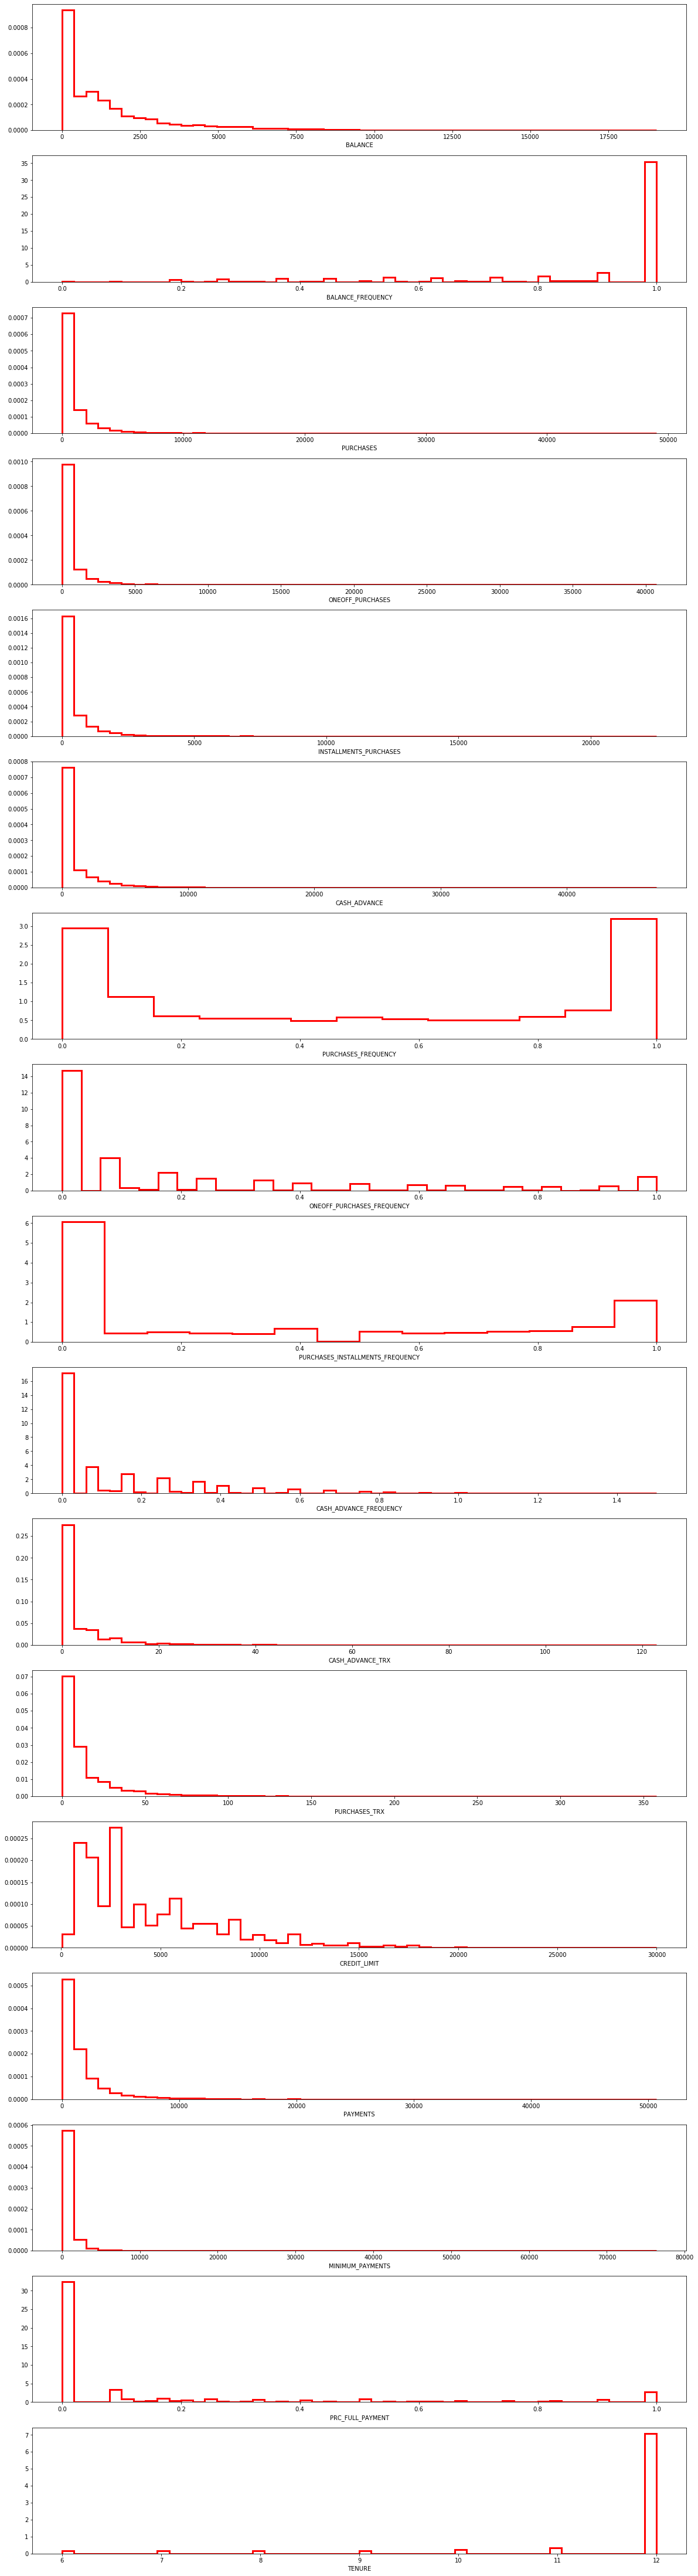

In [16]:
fig = plt.figure(figsize=(20,80))

for i in range(len(data.columns)):
    fig.add_subplot(17,1,i+1)
    sns.distplot(data.dropna().iloc[:,i],hist=True, rug=False, norm_hist=True, kde=False,
                 hist_kws={"histtype":"step", "color":"red", "linewidth":3, "alpha":1},
                 kde_kws={"color":"blue"})
    plt.xlabel(data.columns[i])
plt.show()

For most of the features there's a big spike at 0. The data distributions are quite skewed. Also we can see that the **TENURE** feature is discrete (6,7,8,8,10,11 or 12).

## Checking for outliers

Let's also check if there are any outliers in the data.

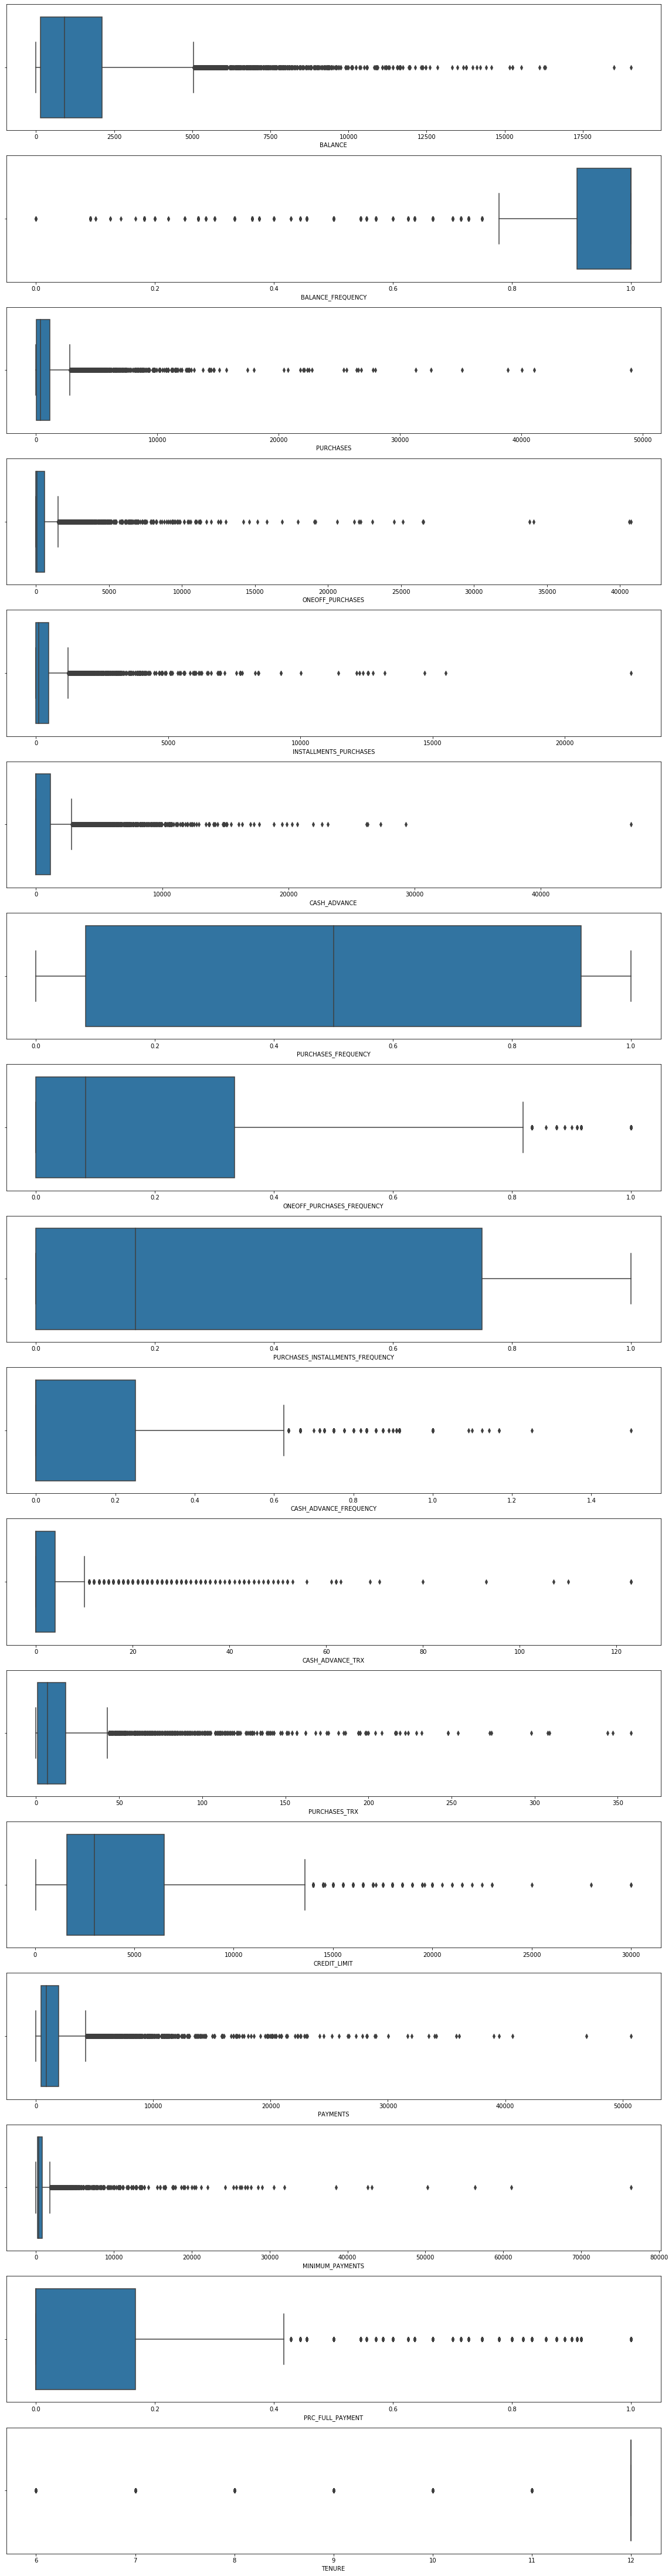

In [17]:
fig = plt.figure(figsize=(20,80))

for i in range(len(data.columns)):
    fig.add_subplot(17,1,i+1)
    sns.boxplot(data.dropna().iloc[:,i])
    plt.xlabel(data.columns[i])
plt.show()

There are a lot of outliers. They will have to be dealt with.

## Checking for correlations

Let's look at the correlation between pairs of attributes. It's worth seeing if any of them are correlated and by how much as we can remove highly correlated features.

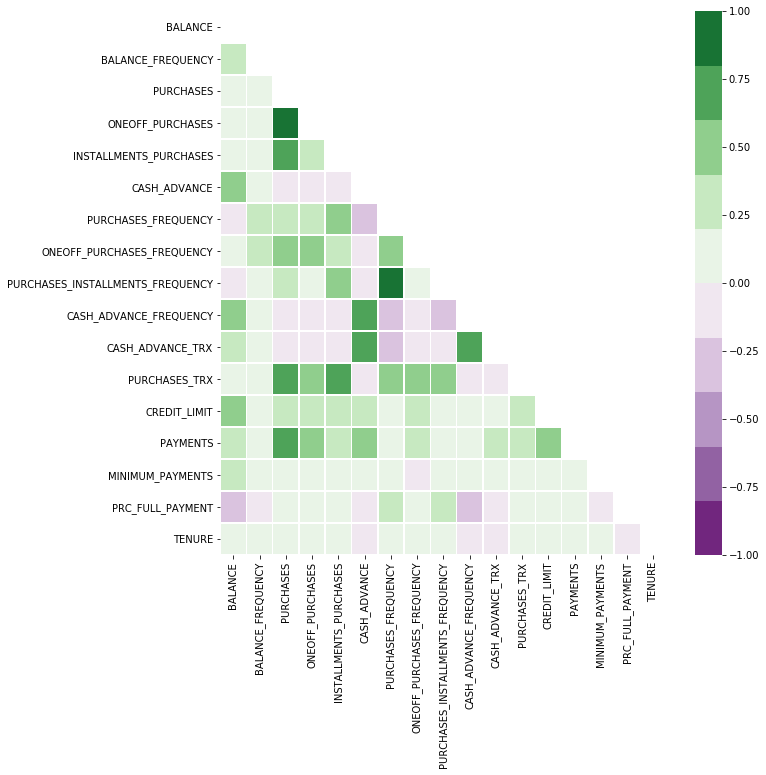

In [18]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(10,10))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask=mask,ax=ax, vmin=-1.0, vmax=1.0,cmap=sns.color_palette("PRGn", 10), linewidths=0.5)

We can see that there are a few features that have a strong correlation with each other.

In [19]:
threshold = 0.50
important_corrs = (corr[abs(corr>threshold)][corr != 1.0].unstack().dropna().to_dict())

unique_important_corrs = pd.DataFrame(
                        list(set([(tuple(sorted(key)), important_corrs[key]) \
                                  for key in important_corrs])), columns=['attribute pair', 'correlation'])

In [20]:
unique_important_corrs.sort_values(by='correlation',ascending=False)

,attribute pair,correlation
5,"(ONEOFF_PURCHASES, PURCHASES)",0.916845
6,"(PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_F...",0.862934
7,"(CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX)",0.799561
9,"(PURCHASES, PURCHASES_TRX)",0.689561
10,"(INSTALLMENTS_PURCHASES, PURCHASES)",0.679896
14,"(CASH_ADVANCE, CASH_ADVANCE_TRX)",0.656498
12,"(CASH_ADVANCE, CASH_ADVANCE_FREQUENCY)",0.628522
13,"(INSTALLMENTS_PURCHASES, PURCHASES_TRX)",0.628108
3,"(PAYMENTS, PURCHASES)",0.603264
8,"(PURCHASES_FREQUENCY, PURCHASES_TRX)",0.568430


Let's analyse some of the correlation values. It makes sense that ONEOFF_PURCHASES and PURCHASES have a high correlation: a customer that makes a lot of one off purchases (as frequency of total purchases) is likely to have a large amount of purchases. Similarly, CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX have a high correlation: a customer who requests cash in advance frequently is obviously going to make a lot cash in advance transactions. I will consider dropping some highly correlated features and see if the clustering outcomes are affected.

# Data Preprocessing

Now that we've explored some of the data, let's do all the preprocessing that we need to do in order to prepare the data for the ML algorithms.

## Missing values

As we determined earlier, **CREDIT_LIMIT** and **MINIMUM_PAYMENTS** have some missing values (1 and 313 respectively).  There are different ways to deal with missing values (data imputation):  
- drop them: depending on the dataset, that can either be a significant percentage or not. In this case, 313/314 represents 3.51% of the data  
- do nothing: some algorithms can handle the missing data (XGBoost) but others cannot; the k-means algorithm will raise a ValueError if nan are provided  
- impute using the mean or the median values: uses the mean or the median values of a feature and replaces the missing values with those. Can only be used with numeric data and it's simple and fast. There are, however, disadvantages. It doesn't take into account correlation between features (i.e. only works at a feature level, not a dataset level). Doesn't work well for categorical features (i.e. don't use it on them) and might not be very accurate. In this dataset, for example, we saw that there is a big difference between the mean and the median due to the presence of outliers. Consequently, which one should be used and what effect will it have on the clustering results?  
- impute using the modes of the features or a constant (zero or otherwise) value: this method can also be used for categorical features but still does not factor in the correlation between the features and can introduce (strengthen) bias in the data. For example, in our dataset, the TENURE (although not containing missing values) mode is 12. Imputing that will increase the skewness of the data. If, instead, one uses zero or another constant value to impute the missing values, how does one decide on it?  
- imputing using a k-NN algorithm: use the feature similarity between data points to predict the values of any missing data points. It can be more accurate than the mean, median or mode imputation methods (depending on the dataset) but is more computationally expensive and very sensitive to outliers (and there are a lot of them in the dataset)  
- using an algorithm like [MICE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/) that fills the missing data multiple times  
- imputation usign deep learning (overkill in this case)  

Let's check again the distributions of the two features that have missing values.

In [21]:
data['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [22]:
data['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

Text(0.5, 0, 'Minimum Payment')

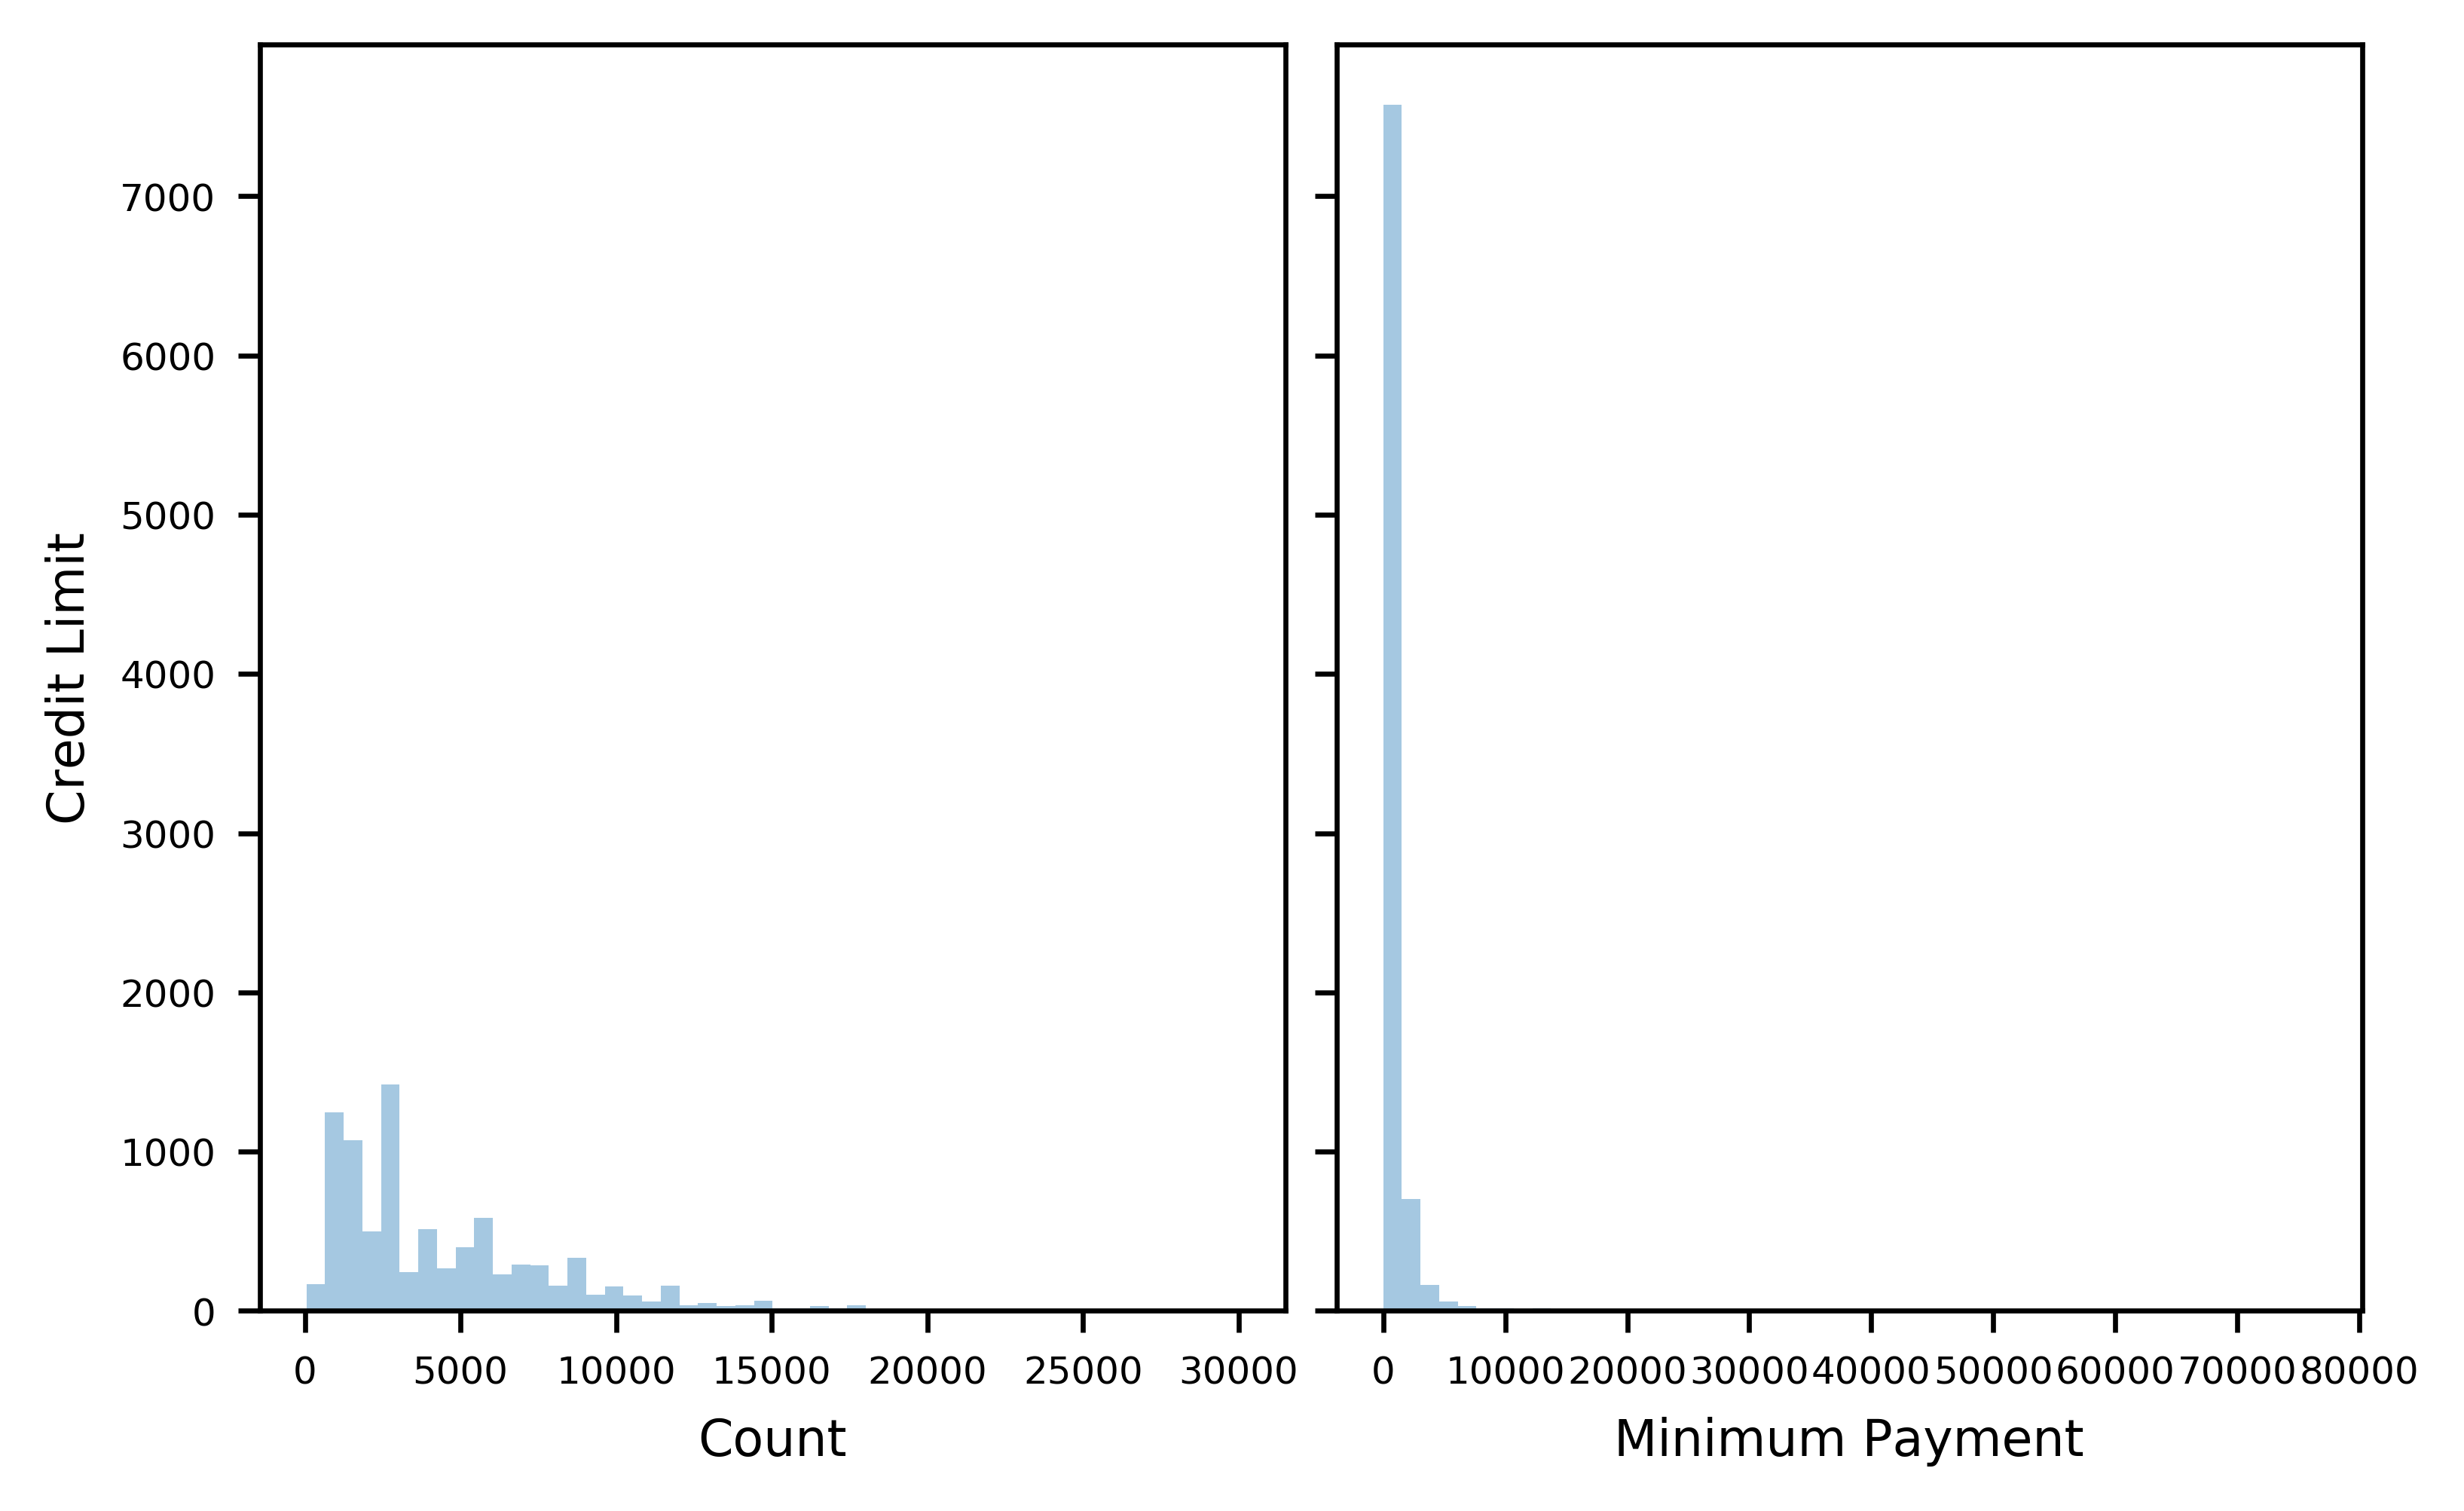

In [23]:
fig, axarr = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.figsize=(6,8)
fig.dpi = 600

sns.distplot(data.dropna()['CREDIT_LIMIT'], kde=False, hist=True, ax=axarr[0])
axarr[0].set_ylabel('Credit Limit', size=8)
axarr[0].set_xlabel('Count', size=8)
axarr[0].tick_params(axis='x', labelsize=6)
axarr[0].tick_params(axis='y', labelsize=6)

fig.subplots_adjust(wspace=0.05, bottom=0.15, top=0.85)

sns.distplot(data.dropna()['MINIMUM_PAYMENTS'], kde=False, hist=True, ax=axarr[1])
axarr[1].set_ylabel(None)
axarr[1].tick_params(axis='x', labelsize=6)
axarr[1].tick_params(axis='y', labelsize=6)
axarr[1].set_xlabel('Minimum Payment', size=8)

It's worth noting that in both cases there are significant outliers, further supporting the idea that using the mean or median to impute the missing values might not be the best idea. Let's consider the sample where the **CREDIT_LIMIT** is missing.

In [24]:
information['BALANCE']

'Available balance left on the card to make purchases (continuous)'

In [25]:
data[data['CREDIT_LIMIT'].isnull()].transpose()

,5203
BALANCE,18.400472
BALANCE_FREQUENCY,0.166667
PURCHASES,0.000000
ONEOFF_PURCHASES,0.000000
INSTALLMENTS_PURCHASES,0.000000
CASH_ADVANCE,186.853063
PURCHASES_FREQUENCY,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.000000
CASH_ADVANCE_FREQUENCY,0.166667


The **CREDIT_LIMIT** mean and median are 4494 and 3000 respectively. For a customer that has requested a cash advance of 186 and used that in his purchases and has a balance on his credit card of 18, the bank is unlikely to offer him a credit limit of 4495 or 3000. Instead, let's look at the most common credit card limit for accounts with small balances (<200).

In [26]:
data[data['BALANCE']<200]['CREDIT_LIMIT'].mode()

0    1000.0
dtype: float64

Imputing 1000.0 for the missing value is a more realistic value. Still, this process is manual. Let's also look at some of the samples where the **MINIMUM_PAYMENTS** feature is missing.

In [27]:
data[data['MINIMUM_PAYMENTS'].isnull()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


Although there are outliers in the **MINIMUM_PAYMENTS** feature, they are more distributed among samples. I will try imputing it with the median. Note that I am not using the mean in this case as there are very large outliers and the mean is greater than Q3.

Let's drop the sample where the **CREDIT_LIMIT** had a missing value and confirm it's been dropped.

In [28]:
data.dropna(subset=['CREDIT_LIMIT'], inplace=True)

In [29]:
data.shape

(8949, 17)

In [30]:
assert data[data['CREDIT_LIMIT'].isnull()].shape[0]==0

Now let's impute the missing values in the **MINIMUM_PAYMENTS** feature with the median.

In [31]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)

Let's confirm it's been done successfully.

In [32]:
assert data[data['MINIMUM_PAYMENTS'].isnull()].shape[0]==0

The data now has no missing values. Please note that these steps will be automated in the transformation pipeline.

## Dealing with outliers

From the boxplot distirbutions we saw that there are significant outliers. Let's count just how many outliers there are in order to figure out what the most appropriate course of action is:
- dropping them  
- leaving them 
- transformation (log)  
- binning/discretisation (creating a number of categories to replace specific ranges of the data)

In [33]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [34]:
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

BALANCE                              695
BALANCE_FREQUENCY                   1492
PURCHASES                            808
ONEOFF_PURCHASES                    1013
INSTALLMENTS_PURCHASES               867
CASH_ADVANCE                        1030
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY           782
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY               525
CASH_ADVANCE_TRX                     804
PURCHASES_TRX                        766
CREDIT_LIMIT                         248
PAYMENTS                             808
MINIMUM_PAYMENTS                     909
PRC_FULL_PAYMENT                    1474
TENURE                              1365
dtype: int64

That's a lot of outliers. Dropping all of them would significantly reduce the size of the dataset. Let's think of other ways to do it.

Let's also consider looking at the z-score for each of the columns and count how many values fall outside 3 standard deviations on either side of the mean.

In [35]:
from scipy import stats
data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].shape

(7434, 17)

In [36]:
data_without_outliers = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

That means that out of 8949 samples, 7434 have all of their columns within 3 standard deviations of the mean and 1515 are outside that range.

In [37]:
data[(np.abs(stats.zscore(data)) >= 3).any(axis=1)].shape

(1515, 17)

Please note the usage of **any** and **all**. When using **all**, it requires the sample data in all of the features to be within the specified range. When using **any**, it requires any of the features in a sample to be outside the specified range. 



One more method of finding outliers is using the **DBSCAN** clustering algorithm which will be discussed later in this study.

There are still a lot of outliers, dropping them might not be the best way to proceed. Why do we need to deal with them in the first place? Let's try visualising the data with and without the outliers. To do so, I will use **Principal Component Analysis** in order to reduce the dimensionality of the data.

## Principal Component Analysis (PCA) - Reducing Dimensionality

Dimensionality reduction is a technique that allows us to reduce the dimensions of the data while still retaining as much of the variance of the original data as possible. Reducing dimensions can either be done through feature selection (ignoring some of the features) or feature extraction (creating a new feature subspace onto which the data is projected). PCA extracts the *principal components of the dataset*, which encompass most of the variance from the original dataset.

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# with the outliers
X_std_with_outliers = StandardScaler().fit_transform(data.values)
pca_with_outliers = PCA(n_components=3)
pca_with_outliers_data = pca_with_outliers.fit_transform(X_std_with_outliers)

# without the outliers
X_std_without_outliers = StandardScaler().fit_transform(data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].values)
pca_without_outliers = PCA(n_components=3)
pca_without_outliers_data = pca_without_outliers.fit_transform(X_std_without_outliers)

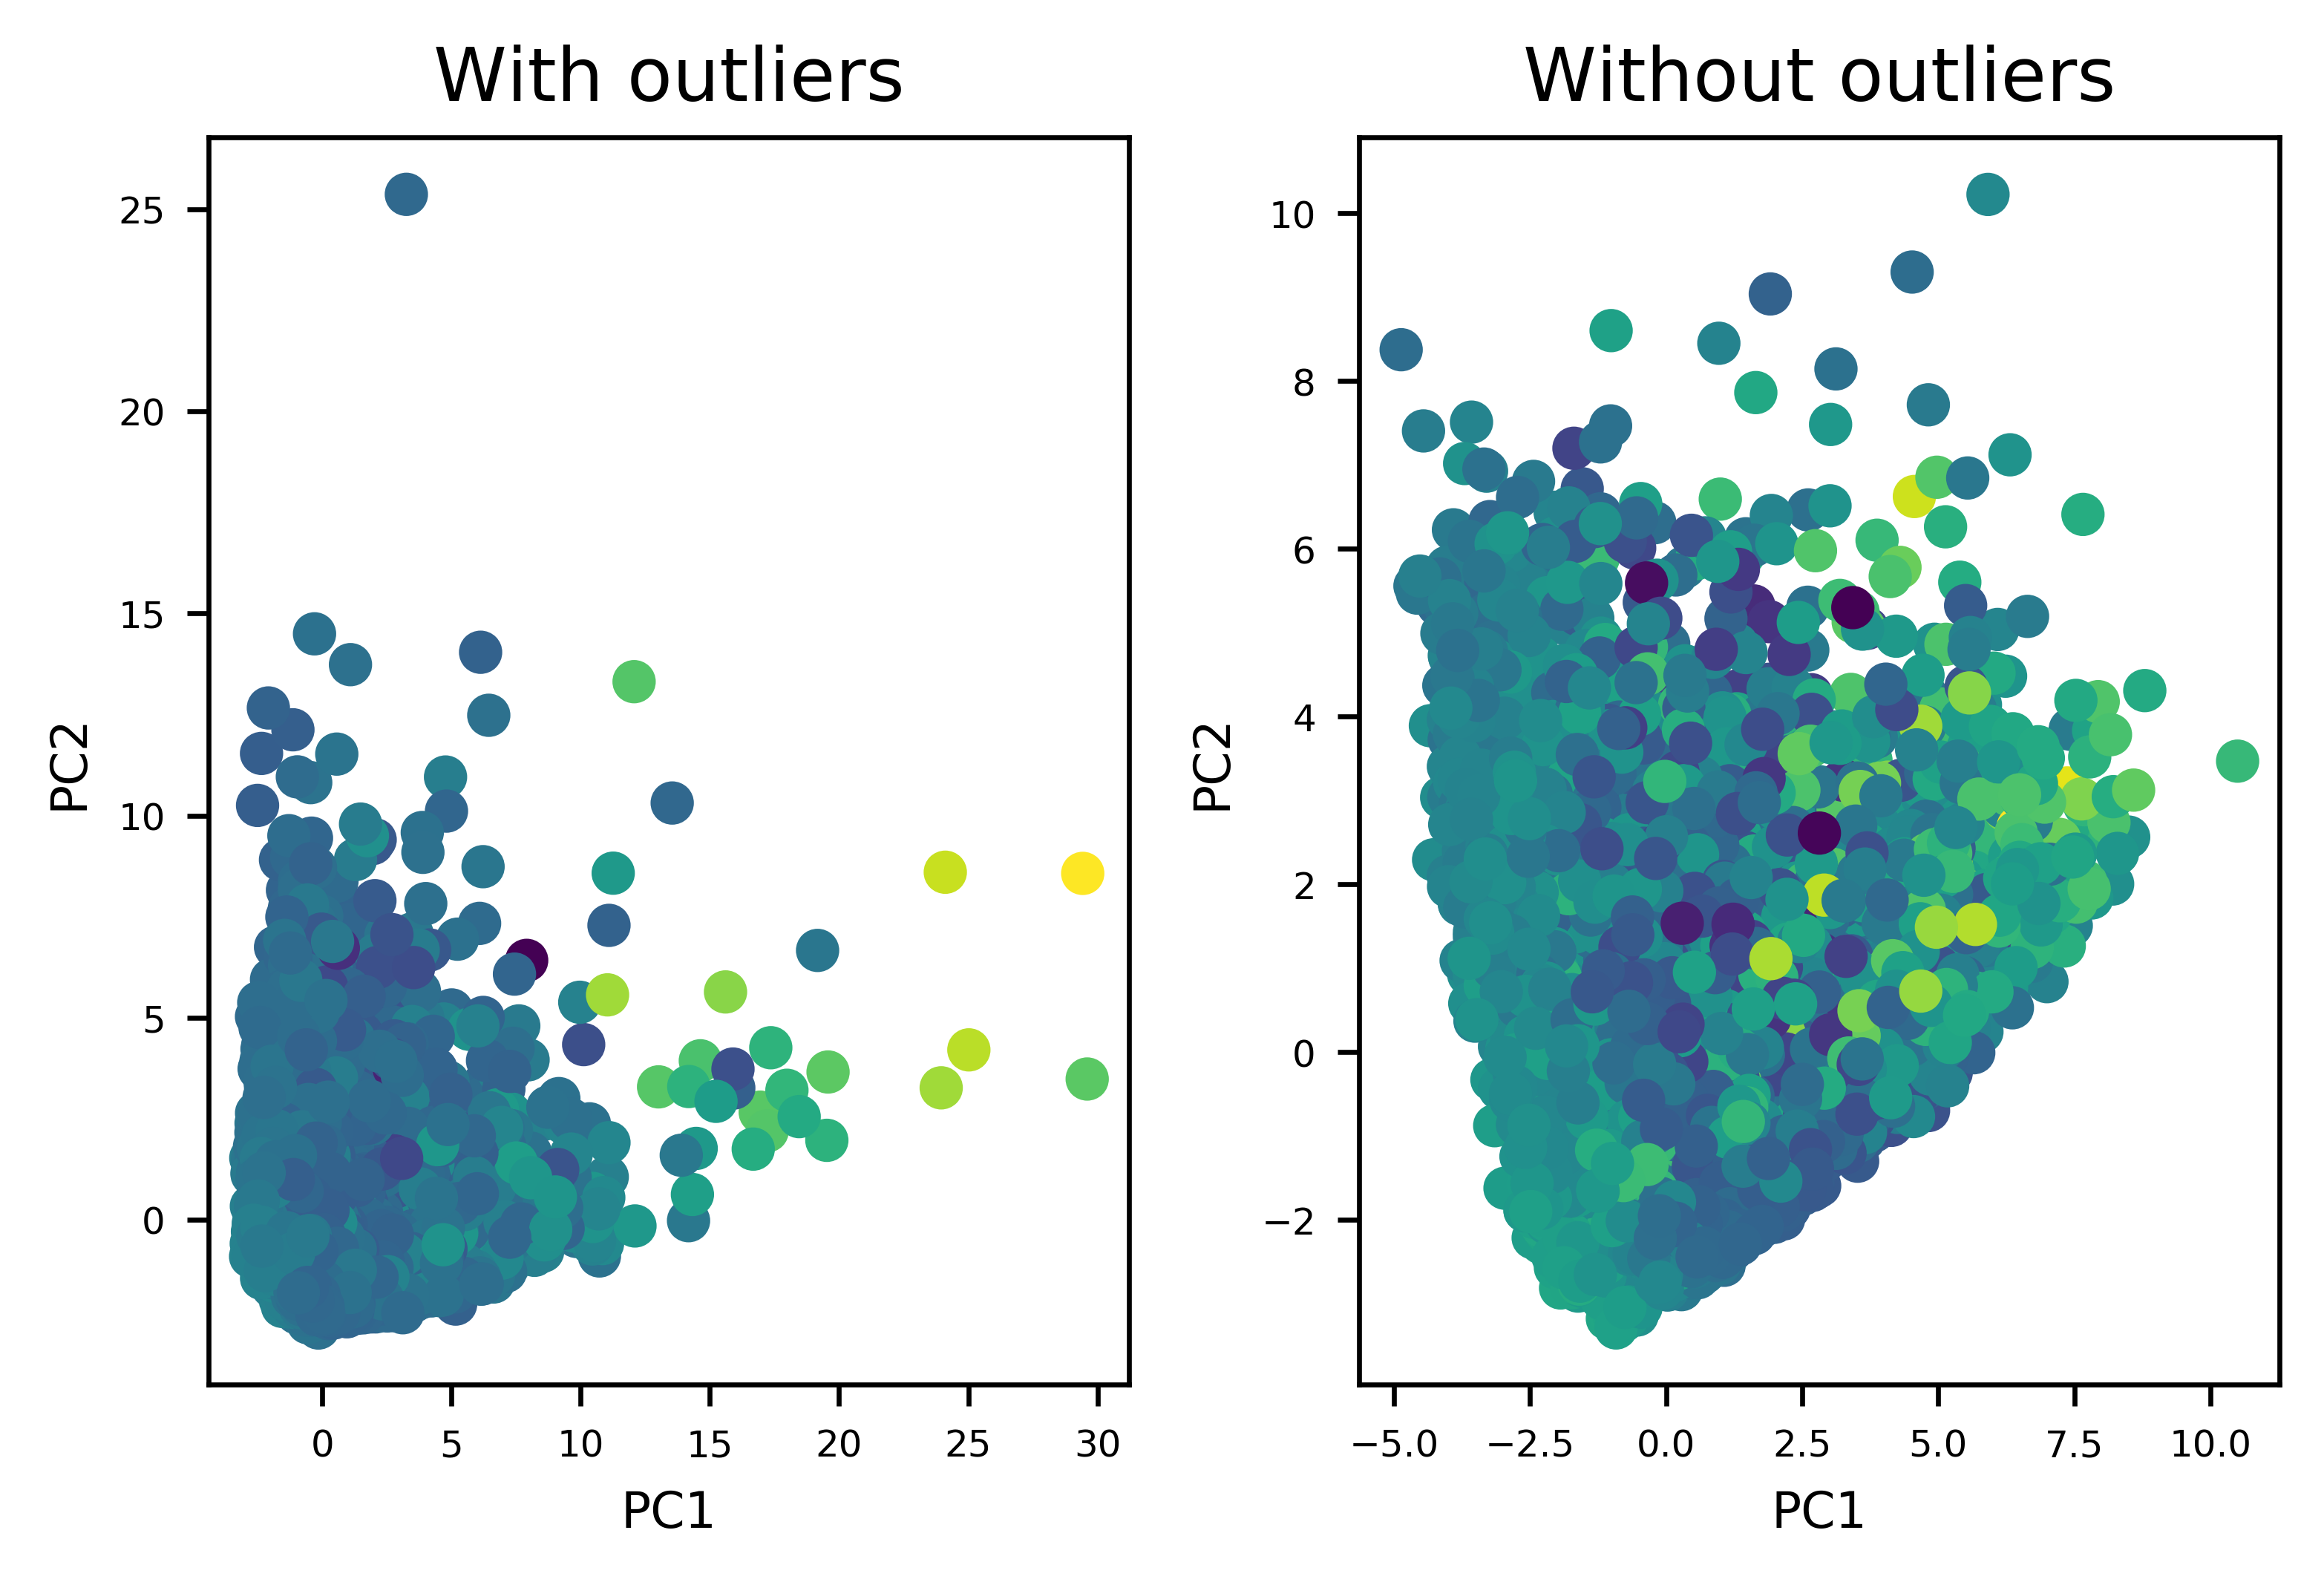

In [39]:
fig, axarr = plt.subplots(nrows=1, ncols=2)
fig.figsize=(6,8)
fig.dpi = 600



axarr[0].scatter(pca_with_outliers_data[:,0], pca_with_outliers_data[:,1], c=pca_with_outliers_data[:,2])
axarr[0].set_xlabel('PC1', size=8)
axarr[0].set_ylabel('PC2', size=8)
axarr[0].tick_params(axis='x', labelsize=6)
axarr[0].tick_params(axis='y', labelsize=6)
axarr[0].set_title('With outliers')

fig.subplots_adjust(wspace=0.25, bottom=0.15, top=0.85)

axarr[1].set_title('Without outliers')
axarr[1].scatter(pca_without_outliers_data[:,0], pca_without_outliers_data[:,1], c=pca_without_outliers_data[:,2])
axarr[1].set_xlabel('PC1', size=8)
axarr[1].set_ylabel('PC2', size=8)
axarr[1].tick_params(axis='x', labelsize=6)
axarr[1].tick_params(axis='y', labelsize=6)

Please note that although there are similarities in the shape of the graph, the scales are very different. Some clustering algorithms are likely to create individual clusters for some of the outliers therefore **dealing with the outliers is very important in this study**. That being said, dropping them might not be advantageous. For example, if considering the **Tenure** feature:

In [40]:
data['TENURE'].describe()

count    8949.000000
mean       11.517935
std         1.337134
min         6.000000
25%        12.000000
50%        12.000000
75%        12.000000
max        12.000000
Name: TENURE, dtype: float64

In [41]:
data['TENURE'].unique()

array([12,  8, 11,  9, 10,  7,  6])

In [42]:
data_without_outliers['TENURE'].unique()

array([12,  8, 11,  9, 10])

If we removed the samples that have outliers in their data, we would remove all customers that have a teunure of 6 or 7 (years?). We would lose an important part of the dataset. Outliers should, therefore, not be removed but instead either transformed or groups should be created.

Another feature of PCA is the possibility to look at which principal components contain most of the information (variance). 

In [43]:
X_data = StandardScaler().fit_transform(data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].values)
pca_with_variance = PCA(0.9999999)
pca_with_variance_data = pca_with_variance.fit_transform(X_data)

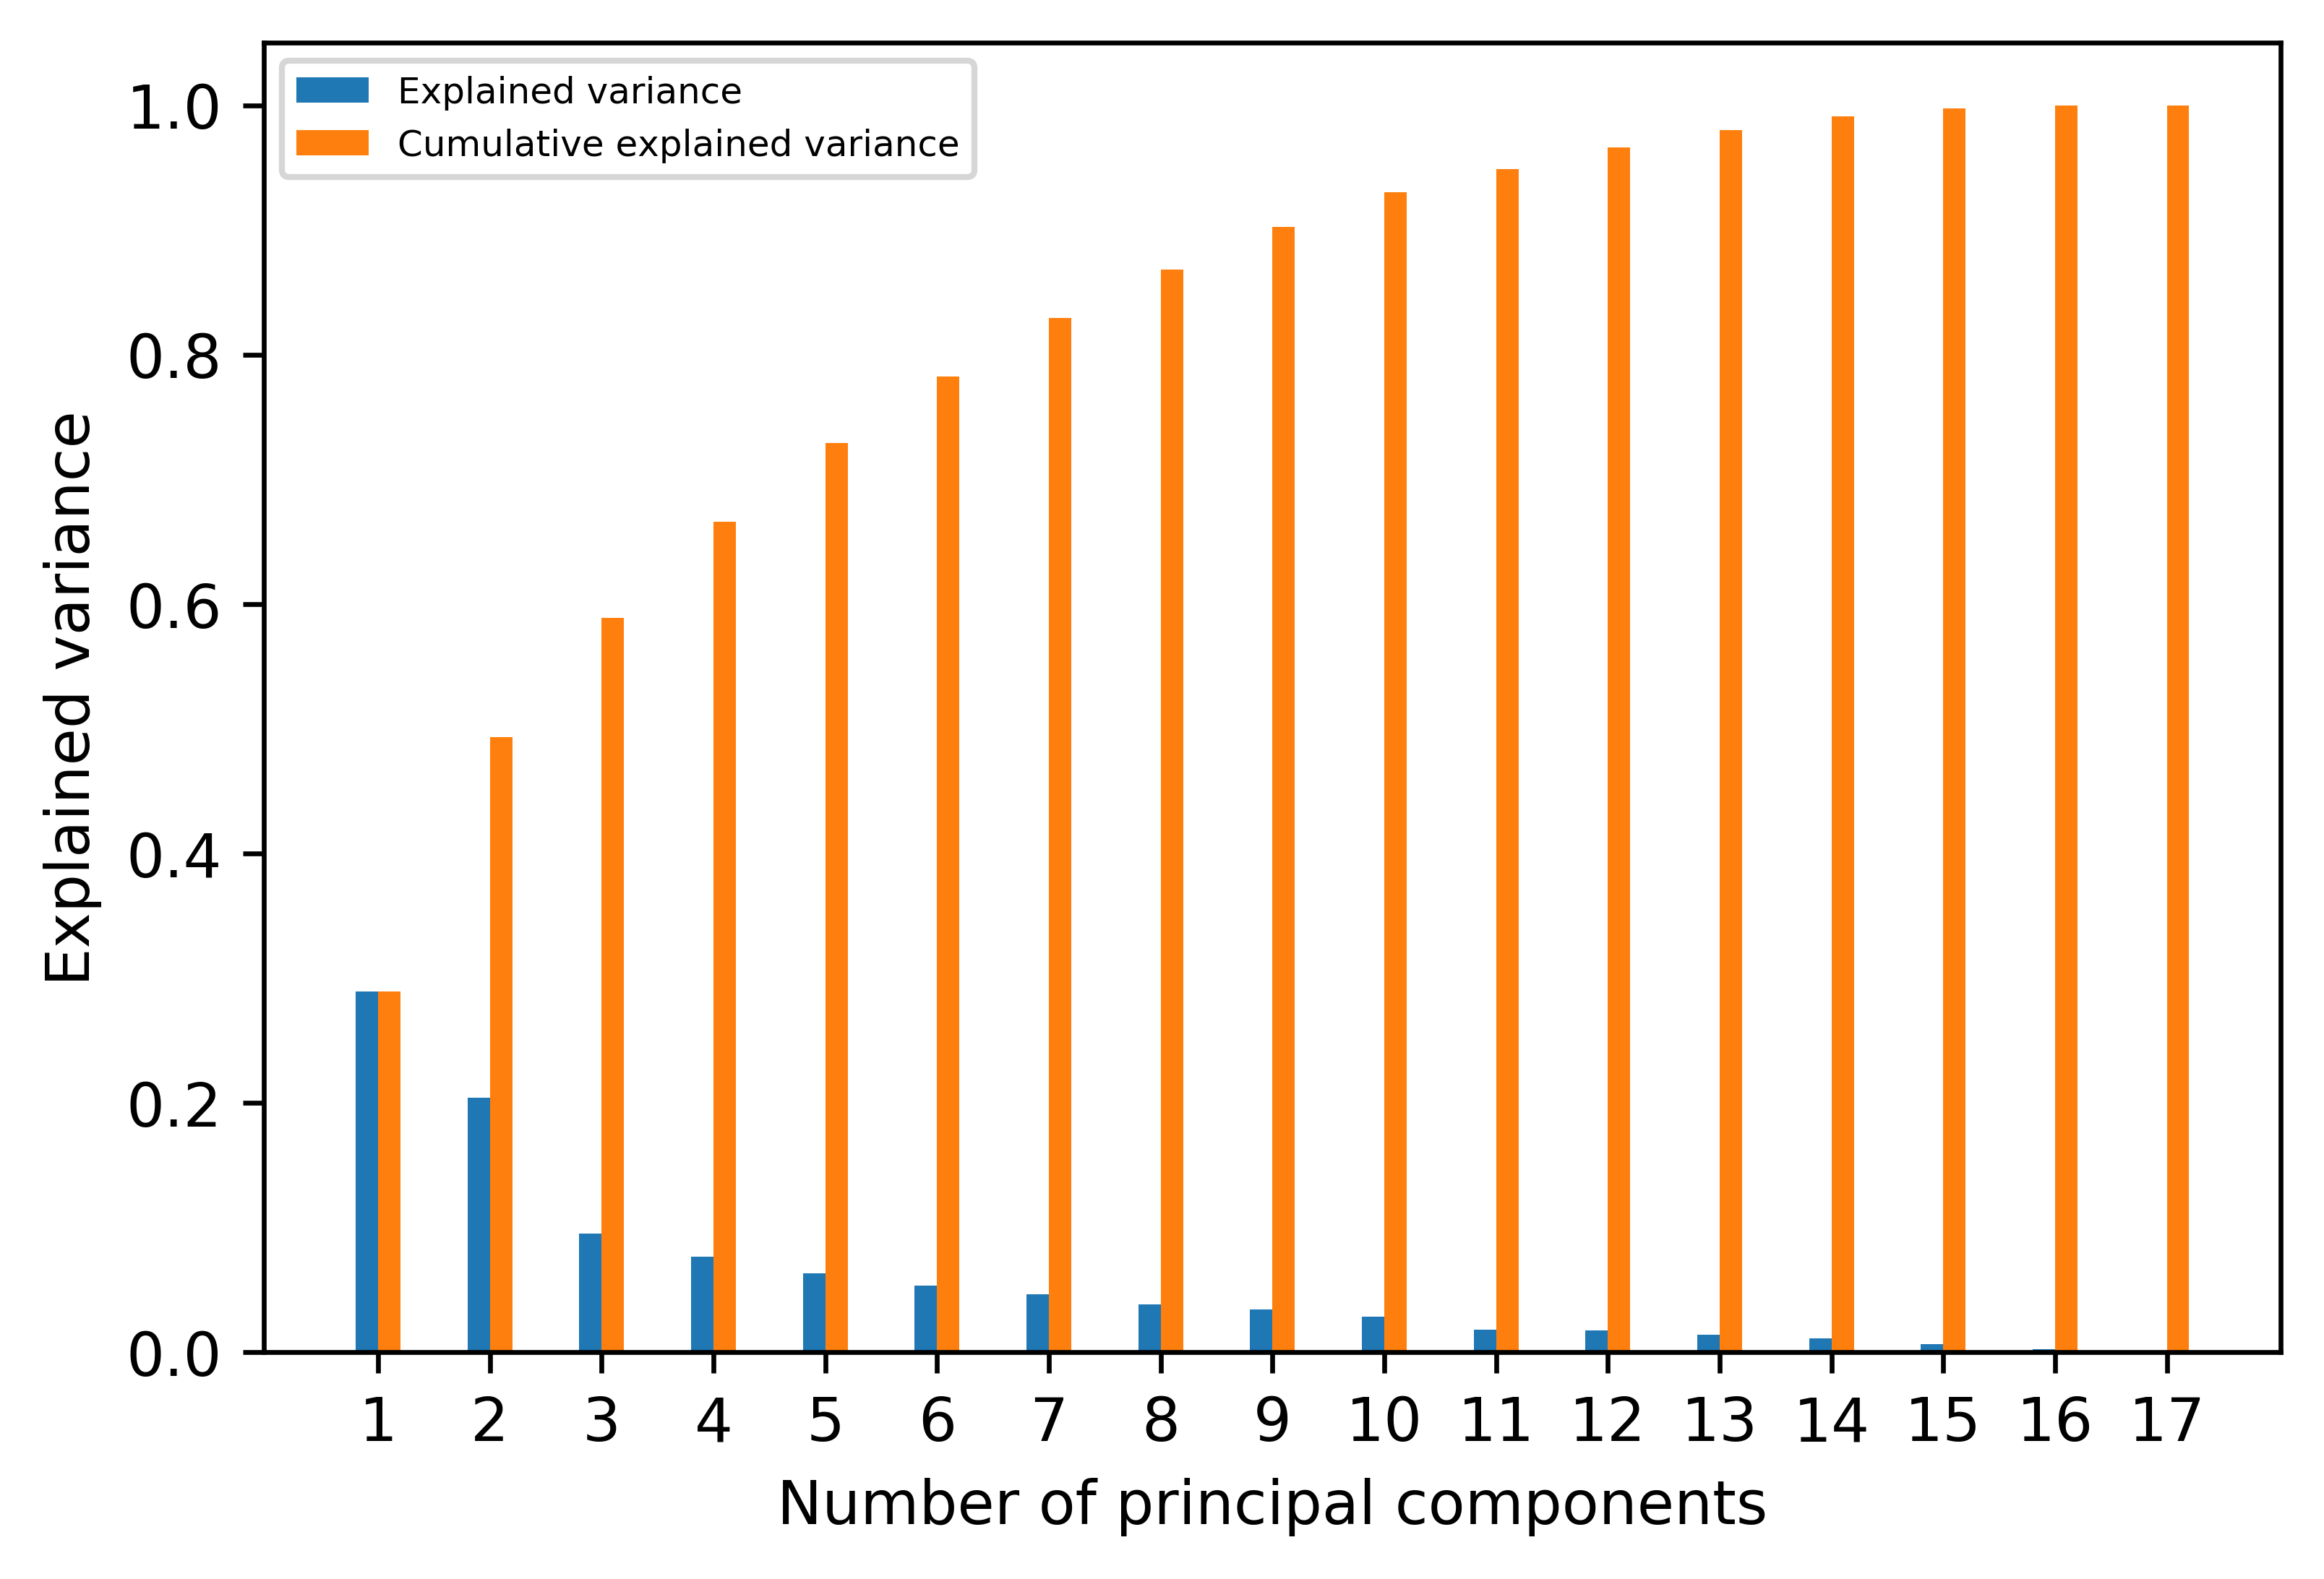

In [44]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.figsize=(2,3)
fig.dpi = 600

x = np.arange(1,pca_with_variance.n_components_+1)
y1 = pca_with_variance.explained_variance_ratio_
y2 = np.cumsum(pca_with_variance.explained_variance_ratio_)

width=0.2

ax.bar(x - width/2, y1, width, label='Explained variance')
ax.bar(x + width/2, y2, width, label='Cumulative explained variance')

ax.set_xlabel('Number of principal components')
ax.set_ylabel('Explained variance')
ax.set_xticks(x)

ax.legend(fontsize=6)



The graph above shows that the first two components provide most of the information (variance) in the dataset. As the number of principal components increases, more and more information is provided (as expected). Please note that is not the way to choose the number of clusters.

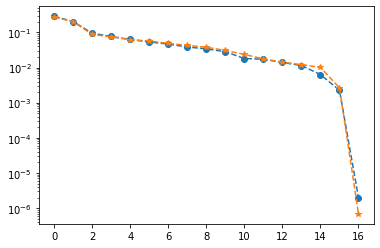

In [45]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#z_scaler = StandardScaler()
z_data_without = StandardScaler().fit_transform(data[(np.abs(stats.zscore(data)) < 3).all(axis=1)].values)
z_data = StandardScaler().fit_transform(data.values)
#z_data = z_scaler.fit_transform(data)
pca_trafo = PCA().fit(z_data_without);
pca_trafo_2 = PCA().fit(z_data)

plt.semilogy(pca_trafo.explained_variance_ratio_, '--o');
plt.semilogy(pca_trafo_2.explained_variance_ratio_, '--*');
#plt.semilogy(pca_trafo.explained_variance_ratio_.cumsum(), '--o');

## Log Transform Outliers

I have decided I will not remove the outliers as that will remove a large percentage of the dataset. Another way to deal with outliers is using *LogTransform*. Logarithmic transformation is commonly used in feature engineering. It helps handling very skewed data and usually after the transformation the data looks more normal. It is also used to decrease the effect of outliers.

Let's consider the **PAYMENTS** feature and its distribution.

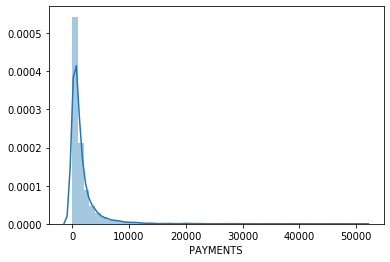

In [46]:
sns.distplot(data['PAYMENTS'])

It is very positively skewed, has a lot of outliers as we saw earlier. Let's see what happens if we log transform it. But first let's check the data to see if it has zeros in it.

In [47]:
data['PAYMENTS'].describe()

count     8949.000000
mean      1733.336511
std       2895.168146
min          0.000000
25%        383.282850
50%        857.062706
75%       1901.279320
max      50721.483360
Name: PAYMENTS, dtype: float64

Since the data has zeros in it, let's add 1 to it. If there were negative values, we'd also have to change the data slightly in order to be able to log it.

In [48]:
log_payments = (data['PAYMENTS']+1).transform(np.log)

In [49]:
log_payments

0       5.312231
1       8.319725
2       6.434654
3       0.000000
4       6.521114
          ...   
8945    5.788719
8946    5.623517
8947    4.410016
8948    3.980615
8949    4.161464
Name: PAYMENTS, Length: 8949, dtype: float64

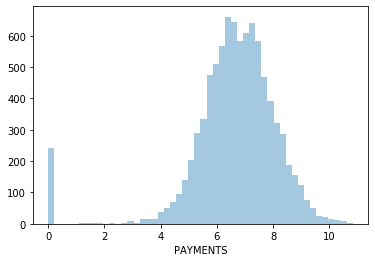

In [50]:
sns.distplot(log_payments, hist=True, kde=False)

The data seems to be bimodal but really what we have is two unimodal distributions. One is for the people that haven't used their credit card to make payments (the peak at 0), and one is for the people who have used their credit cards for payments. Let's apply log-transform to all of the variables and check the corresponding distributions. Please note that for some of them (the FREQUENCY features), applying a log-transform won't improve them.

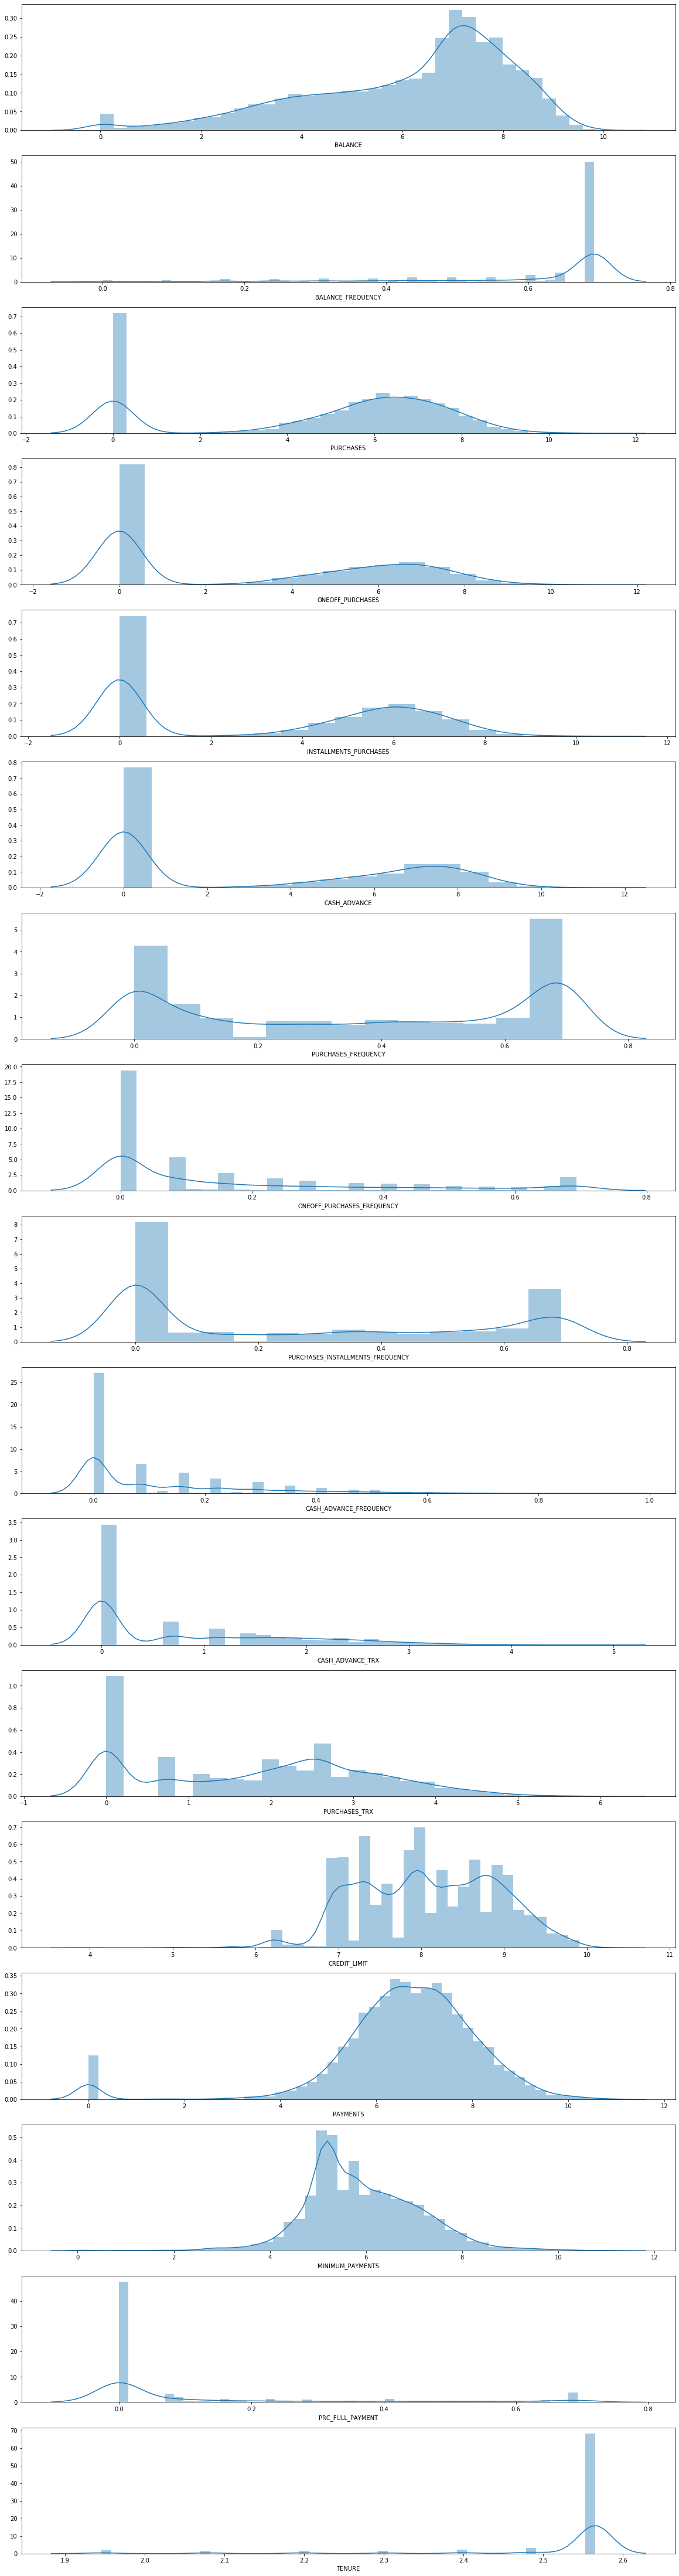

In [51]:
fig = plt.figure(figsize=(20,80))

for i in range(len(data.columns)):
    fig.add_subplot(17,1,i+1)
    sns.distplot((data.iloc[:,i]+1).transform(np.log))
    plt.xlabel(data.columns[i])
plt.show()

After log transform a lot of the data has one bin that's quite significant. Let me split the log transformed the data into a smaller number of bins and that will transition nicely into the following section.

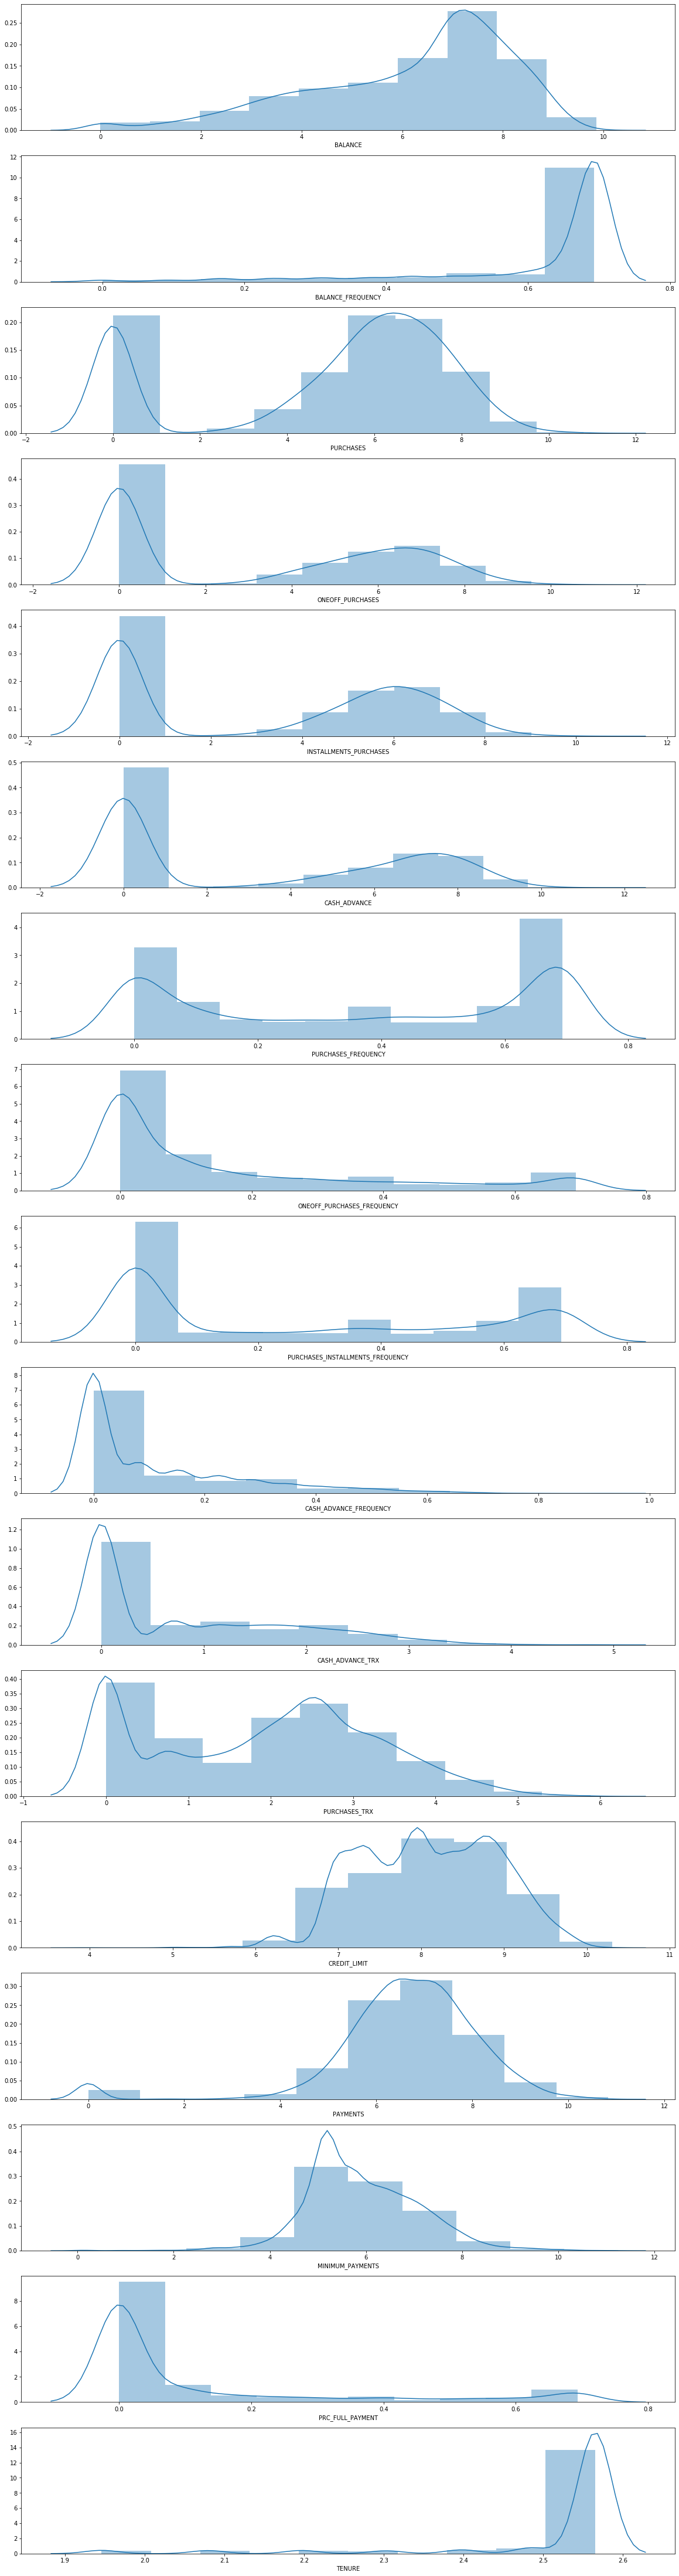

In [52]:
fig = plt.figure(figsize=(20,80))

for i in range(len(data.columns)):
    fig.add_subplot(17,1,i+1)
    sns.distplot((data.iloc[:,i]+1).transform(np.log), bins=10)
    plt.xlabel(data.columns[i])
plt.show()

Splitting the log transformed data into a limited number of bins created a distribution of data that allows the features to be distinguishable slightly easier. Let's explore the effect of binning more in the next section. 

In [53]:
binned_data = data.copy()

## Binning/discretisation of data (splitting into categories)

Binning the data into specific bins can be used to decrease the spread of the data and handle some of the outliers. For example, let's consider the **MINIMUM_PAYMENTS** feature and its distribution.

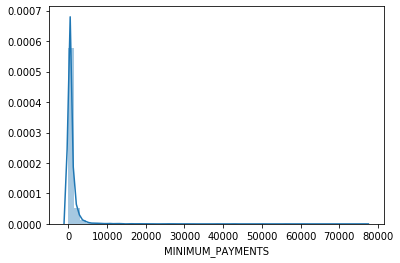

In [54]:
sns.distplot(data['MINIMUM_PAYMENTS'], kde=True, hist=True)

The distribution is very positively skewed. Let's see what happens when we choose a specific number of bins.

In [55]:
pd.qcut(data['MINIMUM_PAYMENTS'], q=5, retbins=True)

(0       (0.018199999999999997, 157.441]
 1                  (994.386, 76406.208]
 2                    (438.881, 994.386]
 3                    (227.732, 438.881]
 4                    (227.732, 438.881]
                      ...               
 8945    (0.018199999999999997, 157.441]
 8946                 (227.732, 438.881]
 8947    (0.018199999999999997, 157.441]
 8948    (0.018199999999999997, 157.441]
 8949    (0.018199999999999997, 157.441]
 Name: MINIMUM_PAYMENTS, Length: 8949, dtype: category
 Categories (5, interval[float64]): [(0.018199999999999997, 157.441] < (157.441, 227.732] < (227.732, 438.881] < (438.881, 994.386] < (994.386, 76406.208]],
 array([1.91630000e-02, 1.57440975e+02, 2.27732332e+02, 4.38881068e+02,
        9.94386093e+02, 7.64062075e+04]))

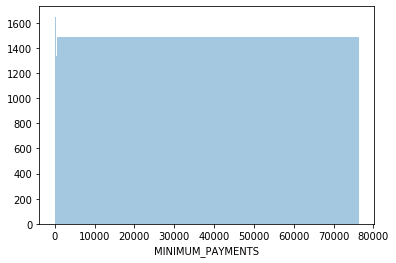

In [56]:
sns.distplot(data['MINIMUM_PAYMENTS'], kde=False, hist=True, bins=[1.91630000e-02, 1.44279612e+02, 1.91915418e+02, 3.12452292e+02,
        5.66389764e+02, 1.16959752e+03, 7.64062075e+04])

Now we have 5 bins of more or less equal size. Note, however, that splitting it into equal sized bins removes some of the "differentiability" (is that a word?) between the features. Let's use the data and split it into a number of bins. How it's actually split depends on each feature and you can only see the final bins below.

In [57]:
binned_data = data.copy()

### Balance Feature

Before binning:

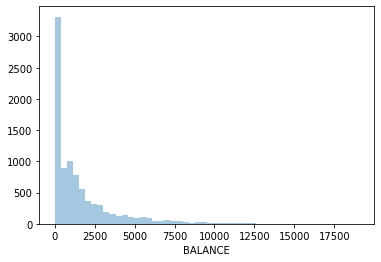

In [58]:
sns.distplot(data['BALANCE'], kde=False, hist=True)

After binning:

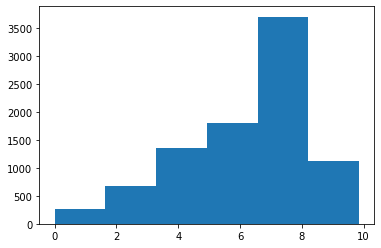

In [59]:
counts, ln_bin_edges, _ = plt.hist((data['BALANCE']+1).apply(np.log), bins=6)

In [60]:
true_partition_edges = np.exp(ln_bin_edges)-1

In [61]:
for i in range(len(true_partition_edges )-1):
    if (i+2)==len(true_partition_edges ):
        binned_data.loc[(data['BALANCE']>= true_partition_edges[i]) &
                        (data['BALANCE']<=  true_partition_edges[i+1]), 'BINNED_BALANCE'] = i
    else:
        binned_data.loc[(data['BALANCE']>= true_partition_edges[i]) &
                        (data['BALANCE']<  true_partition_edges[i+1]), 'BINNED_BALANCE'] = i


(array([ 263.,    0.,  682.,    0., 1363.,    0., 1813.,    0., 3707.,
        1121.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

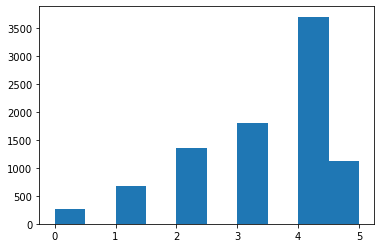

In [62]:
plt.hist(binned_data['BINNED_BALANCE'])

### Balance Frequency Feature

Before binning:

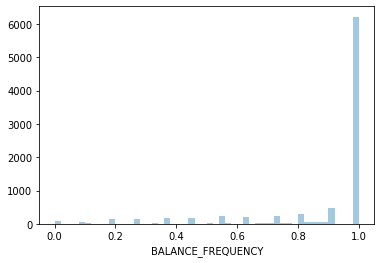

In [63]:
sns.distplot(data['BALANCE_FREQUENCY'], kde=False, hist=True)

This feature doesn't have to be log transformed. After binning:

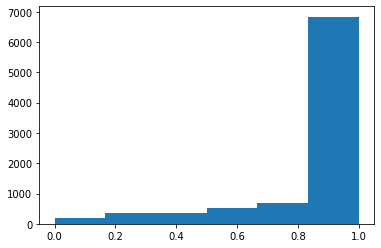

In [64]:
counts, bin_edges, _ = plt.hist(data['BALANCE_FREQUENCY'], bins=6)

In [65]:
for i in range(len(bin_edges)-1):
    if (i+2)==len(bin_edges):
        binned_data.loc[(binned_data['BALANCE_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['BALANCE_FREQUENCY']<=  bin_edges[i+1]), 'BINNED_BALANCE_FREQUENCY'] = i
    else:
        binned_data.loc[(binned_data['BALANCE_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['BALANCE_FREQUENCY']<  bin_edges[i+1]), 'BINNED_BALANCE_FREQUENCY'] = i

(array([ 176.,    0.,  364.,    0.,  373.,    0.,  514.,    0.,  685.,
        6837.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

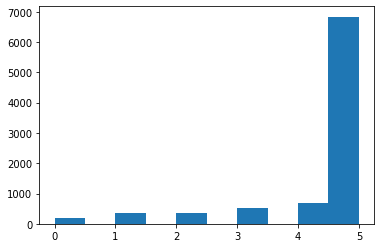

In [66]:
plt.hist(binned_data['BINNED_BALANCE_FREQUENCY'])

### Purchases Feature

Before binning:

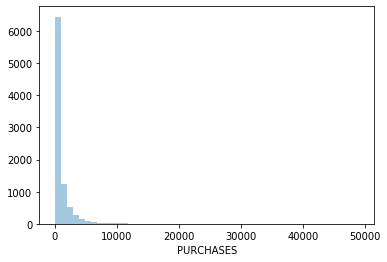

In [67]:
sns.distplot(data['PURCHASES'], kde=False, hist=True)

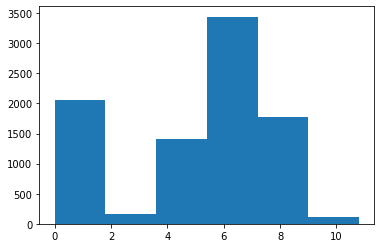

In [68]:
counts, ln_bin_edges, _ = plt.hist((data['PURCHASES']+1).apply(np.log), bins=6)

In [69]:
true_partition_edges = np.exp(ln_bin_edges)-1

In [70]:
for i in range(len(ln_bin_edges)-1):
    if (i+2)==len(ln_bin_edges):
        binned_data.loc[(data['PURCHASES']>= true_partition_edges[i]) &
                        (data['PURCHASES']<=  true_partition_edges[i+1]), 'BINNED_PURCHASES'] = i
    else:
        binned_data.loc[(data['PURCHASES']>= true_partition_edges[i]) &
                        (data['PURCHASES']<  true_partition_edges[i+1]), 'BINNED_PURCHASES'] = i


/Users/vp1712/Python/ml/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/vp1712/Python/ml/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2057.,    0.,  155.,    0., 1410.,    0., 3440.,    0., 1768.,
         118.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

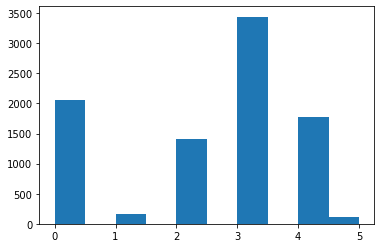

In [71]:
plt.hist(binned_data['BINNED_PURCHASES'])

### Oneoff Purchases Feature

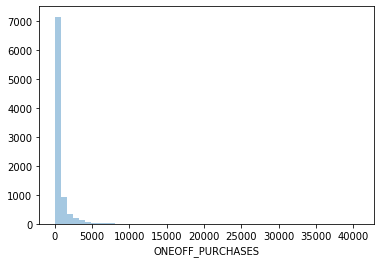

In [72]:
sns.distplot(data['ONEOFF_PURCHASES'], kde=False, hist=True)

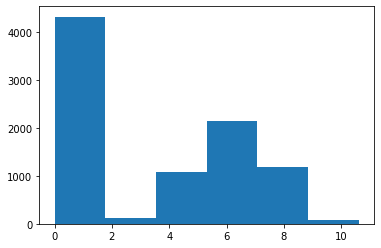

In [73]:
counts, ln_bin_edges, _ = plt.hist((data['ONEOFF_PURCHASES']+1).apply(np.log), bins=6)


(array([4320.,    0.,  122.,    0., 1089.,    0., 2148.,    0., 1189.,
          81.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

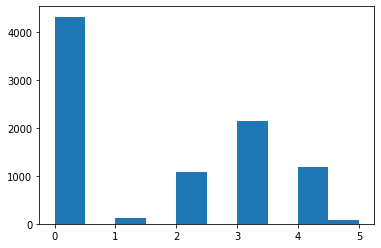

In [74]:
true_partition_edges = np.exp(ln_bin_edges)-1
for i in range(len(ln_bin_edges)-1):
    if (i+2)==len(ln_bin_edges):
        binned_data.loc[(data['ONEOFF_PURCHASES']>= true_partition_edges[i]) &
                        (data['ONEOFF_PURCHASES']<=  true_partition_edges[i+1]), 'BINNED_ONEOFF_PURCHASES'] = i
    else:
        binned_data.loc[(data['ONEOFF_PURCHASES']>= true_partition_edges[i]) &
                        (data['ONEOFF_PURCHASES']<  true_partition_edges[i+1]), 'BINNED_ONEOFF_PURCHASES'] = i
plt.hist(binned_data['BINNED_ONEOFF_PURCHASES'])

### Installments Purchases Feature

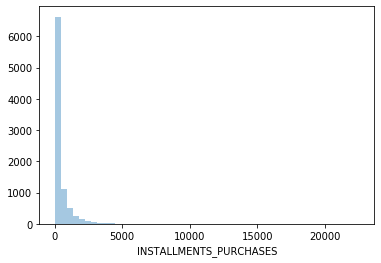

In [75]:
sns.distplot(data['INSTALLMENTS_PURCHASES'], kde=False, hist=True)

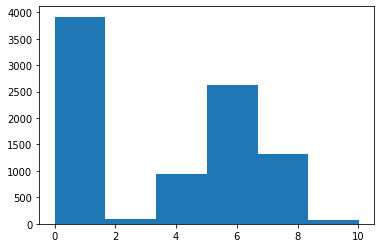

In [76]:
counts, ln_bin_edges, _ = plt.hist((data['INSTALLMENTS_PURCHASES']+1).apply(np.log), bins=6)


(array([3916.,    0.,   86.,    0.,  940.,    0., 2621.,    0., 1317.,
          69.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

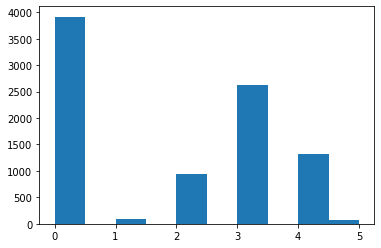

In [77]:
true_partition_edges = np.exp(ln_bin_edges)-1
for i in range(len(ln_bin_edges)-1):
    if (i+2)==len(ln_bin_edges):
        binned_data.loc[(data['INSTALLMENTS_PURCHASES']>= true_partition_edges[i]) &
                        (data['INSTALLMENTS_PURCHASES']<=  true_partition_edges[i+1]), 'BINNED_INSTALLMENTS_PURCHASES'] = i
    else:
        binned_data.loc[(data['INSTALLMENTS_PURCHASES']>= true_partition_edges[i]) &
                        (data['INSTALLMENTS_PURCHASES']<  true_partition_edges[i+1]), 'BINNED_INSTALLMENTS_PURCHASES'] = i
plt.hist(binned_data['BINNED_INSTALLMENTS_PURCHASES'])

### Cash Advance Feature

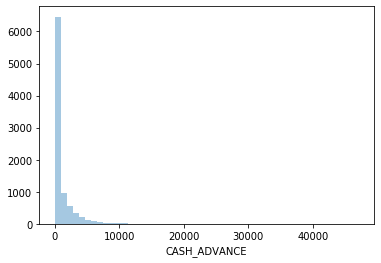

In [78]:
sns.distplot(data['CASH_ADVANCE'], kde=False, hist=True)

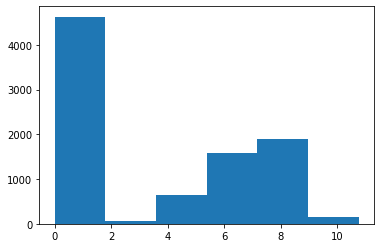

In [79]:
counts, ln_bin_edges, _ = plt.hist((data['CASH_ADVANCE']+1).apply(np.log), bins=6)


(array([4628.,    0.,   53.,    0.,  643.,    0., 1579.,    0., 1892.,
         153.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

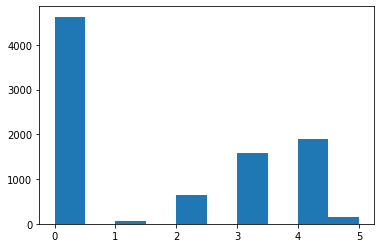

In [80]:
true_partition_edges = np.exp(ln_bin_edges)-1
for i in range(len(ln_bin_edges)-1):
    if (i+2)==len(ln_bin_edges):
        binned_data.loc[(data['CASH_ADVANCE']>= true_partition_edges[i]) &
                        (data['CASH_ADVANCE']<=  true_partition_edges[i+1]), 'BINNED_CASH_ADVANCE'] = i
    else:
        binned_data.loc[(data['CASH_ADVANCE']>= true_partition_edges[i]) &
                        (data['CASH_ADVANCE']<  true_partition_edges[i+1]), 'BINNED_CASH_ADVANCE'] = i
plt.hist(binned_data['BINNED_CASH_ADVANCE'])

### Purchases Frequency Feature

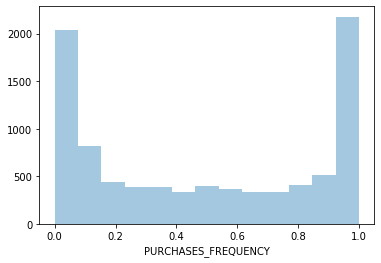

In [81]:
sns.distplot(data['PURCHASES_FREQUENCY'], kde=False, hist=True)


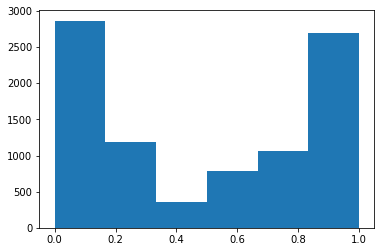

In [82]:
counts, bin_edges, _ = plt.hist(data['PURCHASES_FREQUENCY'], bins=6)



(array([2865.,    0., 1191.,    0.,  351.,    0.,  790.,    0., 1057.,
        2695.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

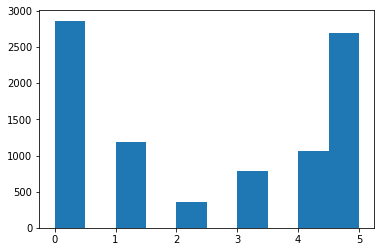

In [83]:
for i in range(len(bin_edges)-1):
    if (i+2)==len(bin_edges):
        binned_data.loc[(binned_data['PURCHASES_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['PURCHASES_FREQUENCY']<=  bin_edges[i+1]), 'BINNED_PURCHASES_FREQUENCY'] = i
    else:
        binned_data.loc[(binned_data['PURCHASES_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['PURCHASES_FREQUENCY']<  bin_edges[i+1]), 'BINNED_PURCHASES_FREQUENCY'] = i

plt.hist(binned_data['BINNED_PURCHASES_FREQUENCY'])


### Oneoff Purchases Frequency Feature

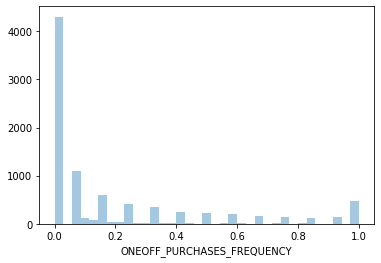

In [84]:
sns.distplot(data['ONEOFF_PURCHASES_FREQUENCY'], kde=False, hist=True)

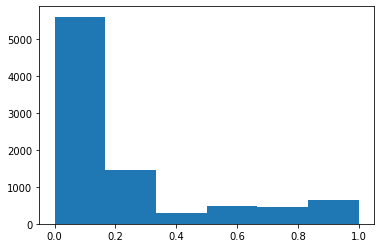

In [85]:
counts, bin_edges, _ = plt.hist(data['ONEOFF_PURCHASES_FREQUENCY'], bins=6)

(array([5604.,    0., 1469.,    0.,  298.,    0.,  470.,    0.,  462.,
         646.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

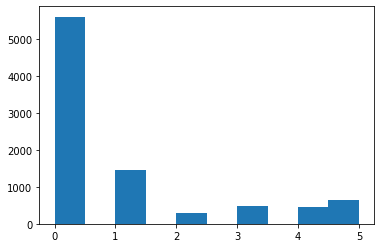

In [86]:
for i in range(len(bin_edges)-1):
    if (i+2)==len(bin_edges):
        binned_data.loc[(binned_data['ONEOFF_PURCHASES_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['ONEOFF_PURCHASES_FREQUENCY']<=  bin_edges[i+1]), 'BINNED_ONEOFF_PURCHASES_FREQUENCY'] = i
    else:
        binned_data.loc[(binned_data['ONEOFF_PURCHASES_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['ONEOFF_PURCHASES_FREQUENCY']<  bin_edges[i+1]), 'BINNED_ONEOFF_PURCHASES_FREQUENCY'] = i

plt.hist(binned_data['BINNED_ONEOFF_PURCHASES_FREQUENCY'])

### Purchases Installments Frequency

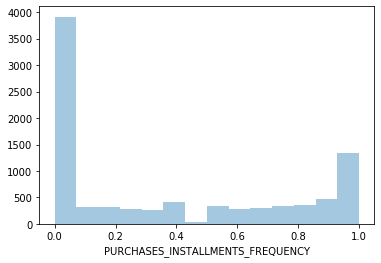

In [87]:
sns.distplot(data['PURCHASES_INSTALLMENTS_FREQUENCY'], kde=False, hist=True)

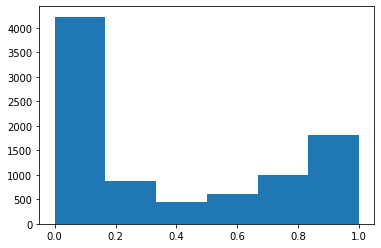

In [88]:
counts, bin_edges, _ = plt.hist(data['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=6)


(array([4227.,    0.,  875.,    0.,  447.,    0.,  606.,    0.,  988.,
        1806.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

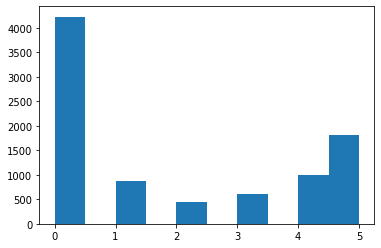

In [89]:
for i in range(len(bin_edges)-1):
    if (i+2)==len(bin_edges):
        binned_data.loc[(binned_data['PURCHASES_INSTALLMENTS_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['PURCHASES_INSTALLMENTS_FREQUENCY']<=  bin_edges[i+1]), 'BINNED_PURCHASES_INSTALLMENTS_FREQUENCY'] = i
    else:
        binned_data.loc[(binned_data['PURCHASES_INSTALLMENTS_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['PURCHASES_INSTALLMENTS_FREQUENCY']<  bin_edges[i+1]), 'BINNED_PURCHASES_INSTALLMENTS_FREQUENCY'] = i

plt.hist(binned_data['BINNED_PURCHASES_INSTALLMENTS_FREQUENCY'])


### Cash Advance Frequency Feature

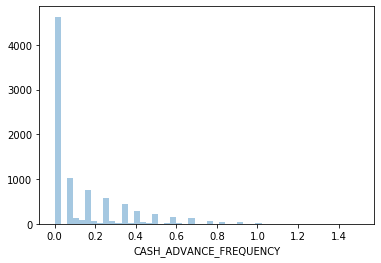

In [90]:
sns.distplot(data['CASH_ADVANCE_FREQUENCY'], kde=False, hist=True)

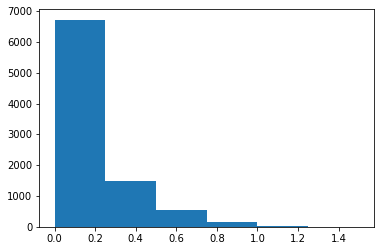

In [91]:
counts, bin_edges, _ = plt.hist(data['CASH_ADVANCE_FREQUENCY'], bins=6)

(array([6.722e+03, 0.000e+00, 1.477e+03, 0.000e+00, 5.510e+02, 0.000e+00,
        1.660e+02, 0.000e+00, 3.100e+01, 2.000e+00]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

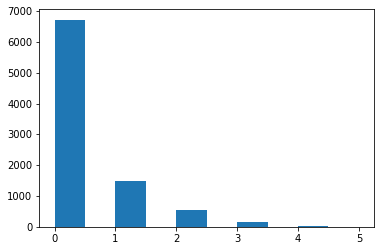

In [92]:
for i in range(len(bin_edges)-1):
    if (i+2)==len(bin_edges):
        binned_data.loc[(binned_data['CASH_ADVANCE_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['CASH_ADVANCE_FREQUENCY']<=  bin_edges[i+1]), 'BINNED_CASH_ADVANCE_FREQUENCY'] = i
    else:
        binned_data.loc[(binned_data['CASH_ADVANCE_FREQUENCY']>= bin_edges[i]) &
                        (binned_data['CASH_ADVANCE_FREQUENCY']<  bin_edges[i+1]), 'BINNED_CASH_ADVANCE_FREQUENCY'] = i

plt.hist(binned_data['BINNED_CASH_ADVANCE_FREQUENCY'])


### Cash Advance TRX Feature

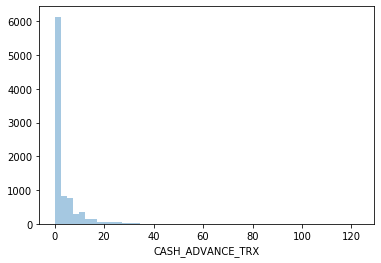

In [93]:
sns.distplot(data['CASH_ADVANCE_TRX'], kde=False, hist=True)

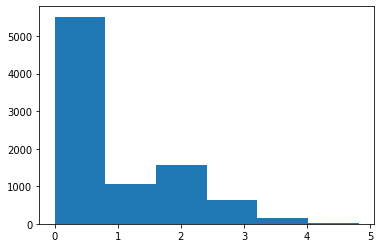

In [94]:
counts, ln_bin_edges, _ = plt.hist((data['CASH_ADVANCE_TRX']+1).apply(np.log), bins=6)

(array([5514.,    0., 1056.,    0., 1575.,    0.,  632.,    0.,  157.,
          15.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

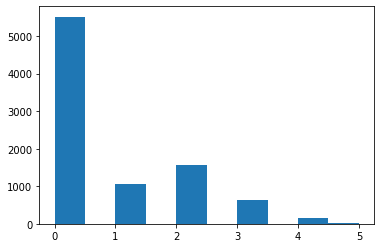

In [95]:
true_partition_edges = np.exp(ln_bin_edges)-1
for i in range(len(ln_bin_edges)-1):
    if (i+2)==len(ln_bin_edges):
        binned_data.loc[(data['CASH_ADVANCE_TRX']>= true_partition_edges[i]) &
                        (data['CASH_ADVANCE_TRX']<=  true_partition_edges[i+1]), 'BINNED_CASH_ADVANCE_TRX'] = i
    else:
        binned_data.loc[(data['CASH_ADVANCE_TRX']>= true_partition_edges[i]) &
                        (data['CASH_ADVANCE_TRX']<  true_partition_edges[i+1]), 'BINNED_CASH_ADVANCE_TRX'] = i
plt.hist(binned_data['BINNED_CASH_ADVANCE_TRX'])


### Purchases TRX Feature

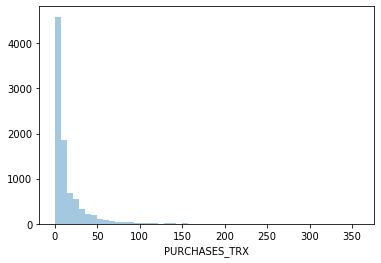

In [96]:
sns.distplot(data['PURCHASES_TRX'], kde=False, hist=True)

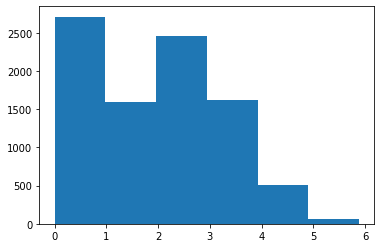

In [97]:
counts, ln_bin_edges, _ = plt.hist((data['PURCHASES_TRX']+1).apply(np.log), bins=6)

(array([2710.,    0., 1597.,    0., 2452.,    0., 1614.,    0.,  514.,
          61.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

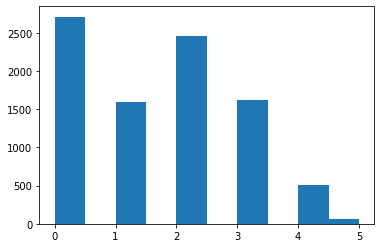

In [98]:
true_partition_edges = np.exp(ln_bin_edges)-1
for i in range(len(ln_bin_edges)-1):
    if (i+2)==len(ln_bin_edges):
        binned_data.loc[(data['PURCHASES_TRX']>= true_partition_edges[i]) &
                        (data['PURCHASES_TRX']<=  true_partition_edges[i+1]), 'BINNED_PURCHASES_TRX'] = i
    else:
        binned_data.loc[(data['PURCHASES_TRX']>= true_partition_edges[i]) &
                        (data['PURCHASES_TRX']<  true_partition_edges[i+1]), 'BINNED_PURCHASES_TRX'] = i
plt.hist(binned_data['BINNED_PURCHASES_TRX'])


### Credit Limit Feature

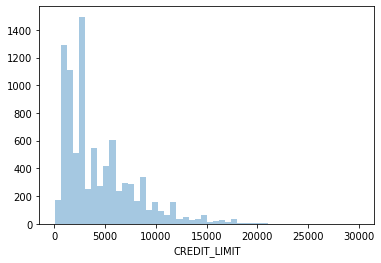

In [99]:
sns.distplot(data['CREDIT_LIMIT'], kde=False, hist=True)

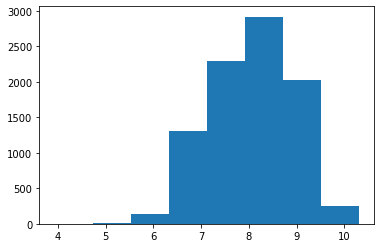

In [100]:
counts, ln_bin_edges, _ = plt.hist((data['CREDIT_LIMIT']+1).apply(np.log), bins=8)

(array([1.000e+00, 8.000e+00, 1.440e+02, 0.000e+00, 1.309e+03, 2.298e+03,
        0.000e+00, 2.918e+03, 2.021e+03, 2.480e+02]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

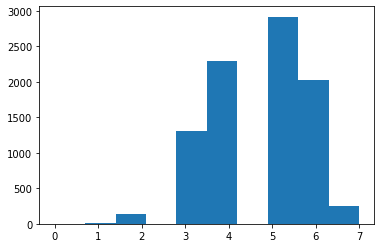

In [101]:
true_partition_edges = np.exp(ln_bin_edges)-1
for i in range(len(ln_bin_edges)-1):
    if (i+2)==len(ln_bin_edges):
        binned_data.loc[(data['CREDIT_LIMIT']>= true_partition_edges[i]) &
                        (data['CREDIT_LIMIT']<=  true_partition_edges[i+1]), 'BINNED_CREDIT_LIMIT'] = i
    else:
        binned_data.loc[(data['CREDIT_LIMIT']>= true_partition_edges[i]) &
                        (data['CREDIT_LIMIT']<  true_partition_edges[i+1]), 'BINNED_CREDIT_LIMIT'] = i
plt.hist(binned_data['BINNED_CREDIT_LIMIT'])


### Payments Feature

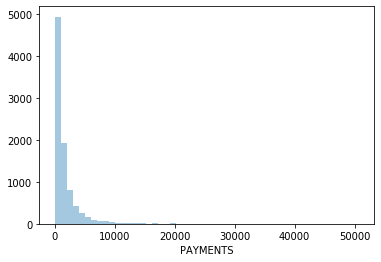

In [102]:
sns.distplot(data['PAYMENTS'], kde=False, hist=True)

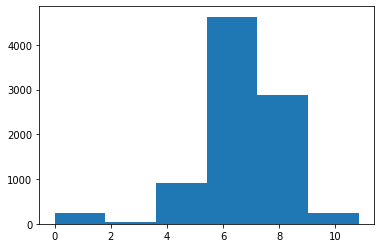

In [103]:
counts, ln_bin_edges, _ = plt.hist((data['PAYMENTS']+1).apply(np.log), bins=6)

(array([ 247.,    0.,   35.,    0.,  907.,    0., 4627.,    0., 2885.,
         247.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

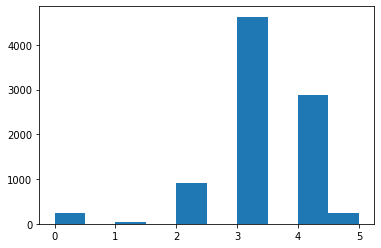

In [104]:
true_partition_edges = np.exp(ln_bin_edges)-1
for i in range(len(ln_bin_edges)-1):
    if (i+2)==len(ln_bin_edges):
        binned_data.loc[(data['PAYMENTS']>= true_partition_edges[i]) &
                        (data['PAYMENTS']<=  true_partition_edges[i+1]), 'BINNED_PAYMENTS'] = i
    else:
        binned_data.loc[(data['PAYMENTS']>= true_partition_edges[i]) &
                        (data['PAYMENTS']<  true_partition_edges[i+1]), 'BINNED_PAYMENTS'] = i
plt.hist(binned_data['BINNED_PAYMENTS'])

### Minimum Payments Feature

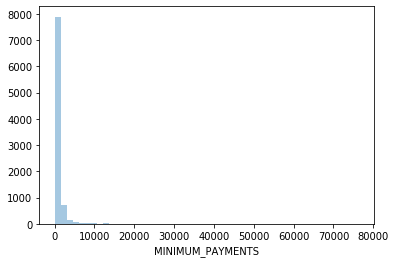

In [105]:
sns.distplot(data['MINIMUM_PAYMENTS'], kde=False, hist=True)


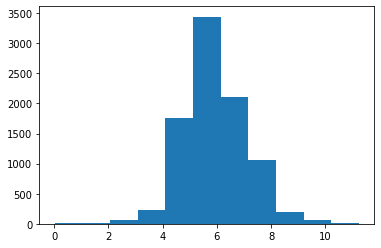

In [106]:
counts, ln_bin_edges, _ = plt.hist((data['MINIMUM_PAYMENTS']+1).apply(np.log), bins=11)

(array([  11.,   10.,   69.,  221., 1750., 3440., 2114., 1053.,  201.,
          78.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

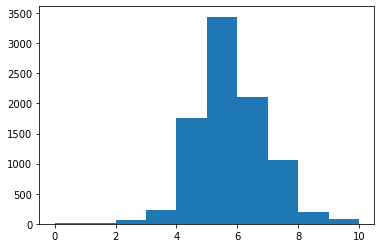

In [107]:
true_partition_edges = np.exp(ln_bin_edges)-1
for i in range(len(ln_bin_edges)-1):
    if (i+2)==len(ln_bin_edges):
        binned_data.loc[(data['MINIMUM_PAYMENTS']>= true_partition_edges[i]) &
                        (data['MINIMUM_PAYMENTS']<=  true_partition_edges[i+1]), 'BINNED_MINIMUM_PAYMENTS'] = i
    else:
        binned_data.loc[(data['MINIMUM_PAYMENTS']>= true_partition_edges[i]) &
                        (data['MINIMUM_PAYMENTS']<  true_partition_edges[i+1]), 'BINNED_MINIMUM_PAYMENTS'] = i
plt.hist(binned_data['BINNED_MINIMUM_PAYMENTS'])


### PRC Full Payment Feature

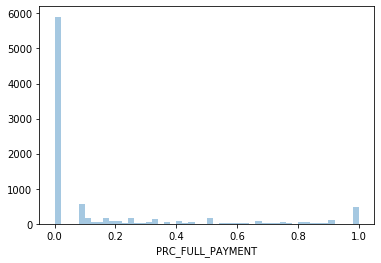

In [108]:
sns.distplot(data['PRC_FULL_PAYMENT'], kde=False, hist=True)

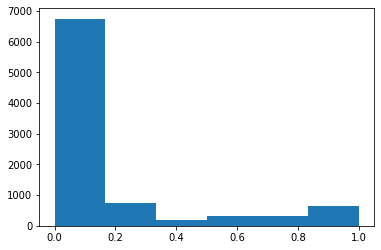

In [109]:
counts, bin_edges, _ = plt.hist(data['PRC_FULL_PAYMENT'], bins=6)

(array([6742.,    0.,  733.,    0.,  198.,    0.,  303.,    0.,  331.,
         642.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

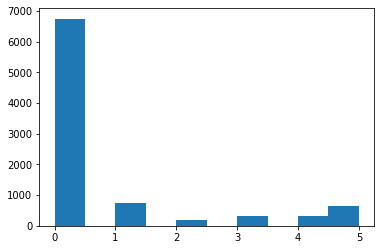

In [110]:
for i in range(len(bin_edges)-1):
    if (i+2)==len(bin_edges):
        binned_data.loc[(binned_data['PRC_FULL_PAYMENT']>= bin_edges[i]) &
                        (binned_data['PRC_FULL_PAYMENT']<=  bin_edges[i+1]), 'BINNED_PRC_FULL_PAYMENT'] = i
    else:
        binned_data.loc[(binned_data['PRC_FULL_PAYMENT']>= bin_edges[i]) &
                        (binned_data['PRC_FULL_PAYMENT']<  bin_edges[i+1]), 'BINNED_PRC_FULL_PAYMENT'] = i

plt.hist(binned_data['BINNED_PRC_FULL_PAYMENT'])


### Tenure Feature


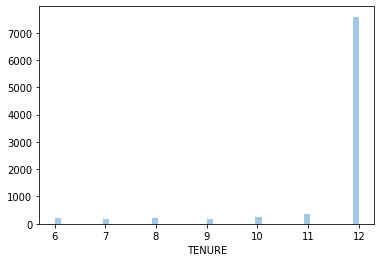

In [111]:
sns.distplot(data['TENURE'], kde=False, hist=True)

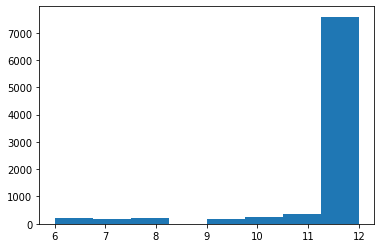

In [112]:
counts, bin_edges, _ = plt.hist((data['TENURE']), bins=8)

(array([ 203.,  190.,  196.,    0.,    0.,  175.,    0.,  236.,  365.,
        7584.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

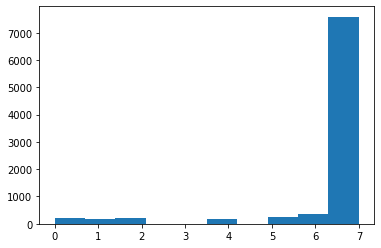

In [113]:
for i in range(len(bin_edges)-1):
    if (i+2)==len(bin_edges):
        binned_data.loc[(data['TENURE']>= bin_edges[i]) &
                        (data['TENURE']<=  bin_edges[i+1]), 'BINNED_TENURE'] = i
    else:
        binned_data.loc[(data['TENURE']>= bin_edges[i]) &
                        (data['TENURE']<  bin_edges[i+1]), 'BINNED_TENURE'] = i
plt.hist(binned_data['BINNED_TENURE'])


In [114]:
binned_data.drop(data.columns, axis=1, inplace=True)

In [115]:
assert(binned_data.shape==data.shape)


# Transformation Pipelines

## TODO: Use the column transformer to do the transformations below

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.base import TransformerMixin, BaseEstimator

In [46]:
# 1st transformer that simply fills missing data and standardises it
data_to_be_transformed=data.copy()

# drop the customer id column
data_to_be_transformed.drop(columns=['CUST_ID'],inplace=True)

# deal with missing values
data_to_be_transformed.dropna(subset=['CREDIT_LIMIT'], inplace=True)
data_to_be_transformed['MINIMUM_PAYMENTS'].fillna(data_to_be_transformed['MINIMUM_PAYMENTS'].median(), inplace=True)

# standardise values
data_std_with_outliers = StandardScaler().fit_transform(data_to_be_transformed.values)

np.savetxt('Data/data_std_with_outliers',data_std_with_outliers)

data_std_with_outliers_dataframe = pd.DataFrame(data_std_with_outliers,
                                                index=data_to_be_transformed.index,
                                                columns=data_to_be_transformed.columns)
data_std_with_outliers_dataframe.to_csv('Data/data_std_with_outliers_dataframe.csv')

In [47]:
def log_bin_data(feature, bins, data=data_to_be_transformed, binned_data=binned_data):
    counts, ln_bin_edges, _ = plt.hist((data[feature]+1).apply(np.log), bins=bins)
    true_partition_edges = np.exp(ln_bin_edges)-1
    for i in range(len(true_partition_edges)-1):
        if (i+2)==len(true_partition_edges):
            binned_data.loc[(data[feature] >= true_partition_edges[i]) &
                            (data[feature] <= true_partition_edges[i+1]), "binned_"+feature] = i
        else:
            binned_data.loc[(data[feature] >= true_partition_edges[i]) &
                            (data[feature] < true_partition_edges[i+1]), "binned_"+feature] = i

            
def bin_data(feature, bins, data=data, binned_data=binned_data):
    counts, bin_edges, _ = plt.hist(data[feature], bins=bins)
    for i in range(len(bin_edges)-1):
        if (i+2)==len(bin_edges):
            binned_data.loc[(binned_data[feature] >= bin_edges[i]) &
                            (binned_data[feature] <= bin_edges[i+1]), "binned_"+feature] = i
        else:
            binned_data.loc[(binned_data[feature] >= bin_edges[i]) &
                            (binned_data[feature] < bin_edges[i+1]), "binned_"+feature] = i

# TODO: combined the above in a single function with an optional log=True argument

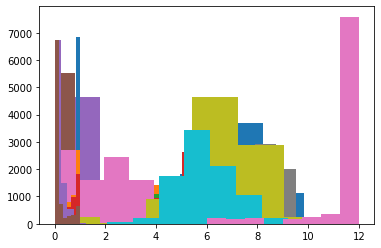

In [48]:
# 2nd transformation that fills missing data, log transforms and bins it

data_to_be_transformed=data.copy()

# drop the customer id column
#data_to_be_transformed.drop(columns=['CUST_ID'],inplace=True)

# deal with missing values
data_to_be_transformed.dropna(subset=['CREDIT_LIMIT'], inplace=True)
data_to_be_transformed['MINIMUM_PAYMENTS'].fillna(data_to_be_transformed['MINIMUM_PAYMENTS'].median(), inplace=True)
binned_data = data_to_be_transformed.copy()

# (Log) and Binning data
features_to_be_log_binned = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
                             'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                             'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                             'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']
log_n_bins = [6,6,6,6,6,6,6,8,6,11]
assert(len(features_to_be_log_binned)==len(log_n_bins))
log_bin_dict = dict(zip(features_to_be_log_binned,log_n_bins))

for i in log_bin_dict.items():
    feat = i[0]
    bins = i[1]
    log_bin_data(feat, bins, data=data_to_be_transformed, binned_data=binned_data)

features_to_be_binned = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 
                         'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                        'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT', 'TENURE']
n_bins = [6,6,6,6,6,6,8]
assert(len(features_to_be_binned)==len(n_bins))
bin_dict=dict(zip(features_to_be_binned,n_bins))

for i in bin_dict.items():
    feat = i[0]
    bins = i[1]
    bin_data(feat, bins, data=data_to_be_transformed, binned_data=binned_data)


binned_data.drop(data.columns, axis=1, inplace=True)


binned_data.to_csv('Data/binned_data_not_std_dataframe.csv')
np.savetxt('Data/binned_data_not_std', binned_data.values)

# standardise values
binned_data_std = StandardScaler().fit_transform(binned_data.values)
np.savetxt('Data/binned_data_std', binned_data_std)

binned_data_std_dataframe = pd.DataFrame(binned_data_std,
                                                index=binned_data.index,
                                                columns=binned_data.columns)
binned_data_std_dataframe.to_csv('Data/binned_data_std_dataframe.csv')




